<center>
<h1> <b>Métodos numéricos</b> </h1>
<h3> <b>Segundo cuatrimestre 2021</b> </h3>
<br>
<h1> <b>Práctica 7: Métodos espectrales</b> </h1>
<h3> Cátedra: Pablo Dmitruk </h3>
<br>
<h3> Fecha límite de entrega: 3 de diciembre de 2021 23:59 </h3>
</center>

### Entrega de:   **COMPLETAR CON SUS NOMBRES**

- [Ejercicios](#ejercicios)

- [Apunte](#explicacion)

- [Funciones útiles](#funciones)

<a name="ejercicios"></a>

# **Ejercicios**

## **Problema 1: Derivadas en espacio de Fourier**

Escriba dos funciones: `diferenciacion_fourier` y `diferenciación_ddff`. Las mismas deberán computar la derivada de un vector usando un método de Fourier y uno de diferencias finitas, respectivamente. Naturalmente, dichas funciones precisarán como entradas el vector a diferenciar, el espaciamiento (uniforme) de la grilla y el orden de la derivada a estimar. 

Para el cálculo de derivadas empleando Fourier, utilice el método pseudoespectral: calcule la FFT, derive en el dominio espectral y transforme la derivada obtenida de nuevo al espacio físico.

Para el caso de `diferenciación_ddff` utilice FinDiff para obtener la matriz de diferenciación y **no considere una grilla periódica**$^\dagger$.

Luego, verifique su implementación de `diferenciacion_fourier` y `diferenciación_ddff` obteniendo el error (en norma infinito) para la derivada primera y segunda en el intervalo $[0, 1)$ de las siguientes funciones:

> $\bf a)$ $f(x) = e^{\mathrm {sen}(2\pi x)}$;

> $\bf b)$ $f(x) = e^{\mathrm {sen}(12\pi x)}$;

> $\bf c)$ $f(x) = \dfrac{1}{3}x^6 - \dfrac{119}{120}x^5 + \dfrac{59}{36}x^3 - \dfrac{47}{48}x^2 - \dfrac{x}{720}$;

> $\bf d)$ $f(x) = x^2$.

En todos casos compute la expresión analítica de las derivadas para obtener el error en función de $N_x$,  utilizando $N_x = \{32; 64; 128; 256 \}$ puntos de grilla. Para el método de diferencias finitas, considere segundo orden de precisión.

**Discuta los resultados hallados analizando gráficamente el orden de convergencia obtenido para cada inciso, en función de la cantidad de derivadas periódicas suaves de $f$**.

<font size="small">
$^\dagger$: Para esto, tenga en cuenta que FinDiff devuelve operadores matriciales que calculan la derivada en todos los puntos sobre los que operan.

In [ ]:
# Su resolución acá

## **Problema 2: Ecuación de advección**

Considere un recinto periódico de dimensiones $[0, 2\pi)$ sobre el que se encuentra definida la ecuación de advección lineal
\begin{equation*}
    \frac{\partial f}{\partial t} + c \frac{\partial f}{\partial x} = 0.
\end{equation*}
Estudiamos ya en la Práctica 3 que al resolver este problema con un esquema de diferencias finitas, la solución obtenida exhibe difusión y **dispersión numérica**. En este ejercicio nos interesa estudiar este último comportamiento. 

La presencia de dispersión numérica en este contexto quiere decir que una onda monocromática $\cos(ax)$ es advectada como $\cos(a(x-c^*t))$, en contraposición a la advección que exhibe el problema continuo: $\cos(a(x-ct))$. Para estudiar la dispersión numérica vamos a utilizar una descomposición de Fourier en tiempo y en espacio de la solución hallada: $\hat{f}(\omega, k)$. Esperamos que el espectro de potencias $|\hat{f}|^2$ presente un pico en $(\omega, k) = (ca, a)$.

Resuelva la ecuación de advección lineal utilizando tanto un método de diferencias finitas (considere un operador periódico centrado) como un método espectral de Fourier. En ambos casos conjugue la correspondiente discretización espacial con un integrador temporal de Runge-Kutta de 4to orden$^\dagger$. Obtenida una solución para cada método espacial, calcule el espectro espacio-temporal de cada una  mediante la función `espectro_espaciotemporal` (ya provista) y grafíquelo (utilizando, por ejemplo, `imshow`) junto con el espectro de la solución exacta.

En particular, considere $c=2$ y los siguientes escenarios

$\bf a)$ $f(0, x) = \cos(5x)$, con $N_x = 24$ puntos de grilla y un paso temporal $\Delta t = 5 \times 10^{-2}$. Integre hasta $t_f=10$. Utilice un método de 4to orden para el esquema de diferencias finitas. _Ayuda: puede hacer zoom en una región $(x_0, y_0) \times(x_1, y_1)$ del gráfico utilizando:_
```python
ax.set_xlim(x0, x1)
ax.set_ylim(y0, y1)
```
_y en caso que deseen evitar que_ `imshow` _fuerce una relación de aspecto, pueden usar_ `imshow(.., aspect="auto")`.

$^\dagger$: Recuerde que por tratarse de un problema lineal puede utilizar el método adaptable visto en prácticas previas con `ORD=4`.

In [ ]:
def espectro_espaciotemporal(f, dt, dx):
    """
        Calcula el espectro de potencias espaciotemporal del arreglo f(t,x),
    asumiendo que la coordenada x es periódica y utilizando una ventana de
    Hanning para reducir el fenómeno de Gibbs en la dirección temporal. Devuelve
    el vector de frecuencias, el de números de onda (solo k≥0), y el espectro
    para números de onda positivos (k≥0).

    Entrada:
        -`f`:  Arreglo (Nt, Nx) con la función cuyo espectro se desea calcular.
        -`dt`: Paso temporal entre muestras en `f`.
        -`dx`: Distancia entre puntos de grilla en la dimensión espacial.

    Salida:
        -`w`: Vector (Nt) de frecuencias
        -`k`: Vector (Nx/2) con números de onda (k≥0).
        -`F`: Arreglo (Nt, Nx/2) con el espectro de potencias espaciotemporal.
    """
    from scipy.signal.windows import hann
    w = 2*np.pi*np.fft.fftfreq (f.shape[0], d=dt)
    k = 2*np.pi*np.fft.rfftfreq(f.shape[1], d=dx)

    f_ventana = f * hann(f.shape[0])[:,None]

    F = np.fft.rfft2(f_ventana)

    return np.fft.fftshift(w), k, np.fft.fftshift(np.abs(F)**2, axes=0)

# Su resolución acá

Veamos que sucede ahora si advectamos una función con escalas más pequeñas pero utilizando más puntos, un mayor tiempo de integración y un mayor orden espacial (para diferencias finitas).

$\bf b)$ $f(0, x) = \cos(10x)$, con $N_x = 64$ puntos de grilla y un paso temporal $\Delta t = 1 \times 10^{-2}$. Integre hasta $t_f=250$. Utilice un método de 8vo orden para el esquema de diferencias finitas.

In [ ]:
# Su resolución acá

Finalmente, vale preguntarse si estos experimentos no están sesgados. Después de todo, estamos advectando funciones trigonométricas utilizando una base trigonométrica. En otras palabras, tal vez, _el que depositó cosenos recibirá cosenos_.

$\bf c)$ $f(0,x) = e^{-(x-\pi)^2}$, con $N_x = 64$ puntos de grilla y un paso temporal $\Delta t = \Delta x/8$. Integre hasta $t_f=30$. Utilice un método de 4to orden para el esquema de diferencias finitas. _Ayuda: puede construir una forma periódica con periódo $L_x$ de la condición inicial mediante el siguiente código_
```python
def exponencial(x, Lx):
    return np.exp(-(x%Lx-np.pi)**2)
```
_adicionalmente, puede serle útil graficar $\log(|\hat f|^2$ a fines de tener una mejor representación de la energía en las distintas escalas._

In [ ]:
# Su resolución acá

$\bf d)$ Discuta brevemente los resultados hallados.

---

## **Problema 3: Ecuación de Burgers**

Volvamos ahora a otro viejo conocido, la ecuación de Burgers:
\begin{equation*}
    \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} - \nu \frac{\partial^2 u}{\partial x^2} = 0.
\end{equation*}
Vamos a integrar mediante un método de Fourier esta ecuación, considerando condiciones de contorno periódicas en el recinto $[0, 8\pi)$ y con condición inicial $u(0, x) = \mathrm{sen}(x/4)$. Para la integración temporal vamos a utilizar un método de Runge-Kutta de 4to orden$^\dagger$.

$\bf a)$ Integre hasta $t_f = 4$ la ecuación de Burgers para $\nu = 0$ con $N_x = 512$ puntos de grilla y $\Delta t = 1\times10^{-3}$. No utilice dealiasing. Verifique cualitativamente la solución hallada y estudie la conservación de la energía. _Ayuda: puede calcular la energía (a menos de una constante) dado un arreglo `u[t,x]` como `energia = np.mean(u**2, axis=1)`._

<font size="small">
$\dagger$: Este problema es no-lineal y por lo tanto no nos servirá el método adaptable.

In [ ]:
# Su resolución acá

$\bf b)$ Escriba una función `dealias` que reciba un arreglo unidimensional real $f(x)$, calcule su transformada de Fourier $\hat f(k)$, anule todos los números de onda tales que $|k| > 2 \max(|k|)/3$ y devuelva la antitransformada de esta cantidad. Puede resultarle útil pasarle a `dealias`, además de $\hat f$, el espaciamiento $\Delta x$ como argumento.

$\bf c)$ Repita el inciso $\bf a)$ pero esta vez realice la operación de _dealiasing_ luego de cada cálculo del término no-lineal.

In [ ]:
# Su resolución acá

$\bf d)$ Integre ahora la ecuación de Burgers con $\nu = 5\times 10^{-2}$ hasta $t_f = 20$$^\dagger$. Utilice un paso temporal $\Delta t = 1 \times 10^{-3}$ y nuevamente $N_x = 512$ puntos de grilla. Verifique cualitativamente la calidad de su solución. No utilice _dealiasing_.

$\bf e)$ Repita $\bf d)$ pero utilizando esta vez la técnica de _dealiasing_ no-lineal. Compare el error en la ecuación de balance para la energía
\begin{equation*}
    \frac{\mathrm d E}{\mathrm d t} = - \nu \int_0^{8\pi} \left( \frac{\partial u}{\partial x} \right)^2 \mathrm d x
\end{equation*}
entre esta integración y la realizada en $\bf d)$. _Ayuda: puede serle de utilidad la función provista en el siguiente bloque de código._

<font size="small">
$\dagger$: Note que como mostró en la Práctica 4, la presencia del término difusivo evita que la solución desarrolle una singularidad a tiempo finito.

In [ ]:
# Su resolución acá

def balance(u, dx, dt):
    """
        Calcula (a menos de constantes) los términos de la ecuación de balance
    energético de la ecuación de Burgers.
    
    Entrada:
        -`u`:  Arreglo (Nt, Nx) con la solución de Burgers.
        -`dx`: Distancia entre puntos de la grilla espacial.
        -`dt`: Paso temporal.
    
    Salida:
        -`dE`:  Arreglo (Nt) con la variación temporal de la energía.
        -`vol`: Integral en espacio del término (du/dx)².
    """
    # Instalar findiff si no está instalado
    !if ! pip list | grep findiff >> /dev/null; then pip install findiff; fi
    from findiff import FinDiff

    # Derivada temporal de la energía
    d_dt = FinDiff(0, dt, acc=6)
    dE   = d_dt(np.mean(u**2/2, axis=1))

    # Integral de (du/dx)².
    k     = 2*np.pi*np.fft.rfftfreq(u.shape[1], d=dx)
    du_dx = np.fft.irfft(1j*k[None,:]*np.fft.rfft(u, axis=-1),
                         n=u.shape[1], axis=-1)
    vol   = np.mean(du_dx**2, axis=1)

    return dE, vol

$\bf f)$ **(OPCIONAL)** Repita el inciso $\bf d)$ utilizando un método de diferencias finitas de segundo orden de tipo Arakawa y compare el error en el balance energético.

---

## **Problema 4: Derivadas con el método de Chebyshev**

Estime utilizando un método de Chebyshev y un método de diferencias finitas de 2do orden la primer y segunda derivada de las siguientes funciones:

$\bf a)$ $f(x) = e^{\mathrm{sen}(10x)}$

$\bf b)$ $f(x) = \dfrac{|x|^3}{6}$

para $x \in [-1, 1]$, utilizando $N_x \in \{32, 64, 128, 256 \}$ puntos de grilla.

$\bf c)$ Compare el orden de convergencia obtenido en cada caso para ambos métodos. Utilice para el método de diferencias finitas la misma grilla que para Chebyshev.

_Nota: Recuerde que para el método de Chebyshev debe utilizar una grilla no uniforme._

_Ayuda: En el apunte encontrará información sobre como construir una grilla para Chebyshev, cómo obtener la matriz de diferenciación asociada $D_\text{cheb}$ y cómo utilizar Findiff sobre grillas no equiespaciadas._

In [ ]:
# Su resolución acá

---

## **Problema 5: Arrastre de un fluido por una placa oscilante**

El objetivo de este problema es resolver el arrastre de fluido confinado confinado por dos placas y donde una de ellas oscila con una cierta frecuencia $\omega$ y amplitud $A$.

Si consideramos que el flujo está dominado por la viscosidad y por lo tanto no desarrollará turbulencia, este problema obedece la ecuación de difusión
\begin{equation*}
    \frac{\partial u}{\partial t} - \nu \frac{\partial^2 u}{\partial y^2} = 0, \qquad \qquad \begin{cases}
    u(0, y)   &= 0,\\
    u(t, 0)   &= A\mathrm{sen}(\omega t), \\
    u(t, L_y) &= 0,
\end{cases}
\end{equation*}
donde asumimos que $u$ es la componente del campo de velocidades en al dirección que oscila la placa, que $y$ es la coordenada normal a la misma y que existe simetría de traslación en la dirección de $u$. Naturalmente, $\nu$ es el coeficiente de difusión de momento, i.e. la viscosidad.

Para valores bajos de $\nu$ o altos de $\omega$, este problema puede generar una capa límite muy delgada cerca de la placa oscilante. Utilizaremos un método de Chebyshev para resolver este problema, aprovechando que concentra más puntos cerca de los bordes. Sin embargo, dado que la relación de CFL de una ecuación de difusión escala como $\nu \Delta t /(\Delta x)^2$, para la integración temporal utilizaremos un método implícito, en particular un método de Crank-Nicolson.

$\bf a)$ Sea $\tilde D^2_\text{cheb}$ la matriz de diferenciación de Chebyshev para la derivada segunda con condiciones de Dirichlet en la primer y última fila. Pruebe que si utiliza la misma en un esquema de Crank-Nicolson, se obtiene el sistema de ecuaciones
\begin{equation*}
    \mathbf u^{n+1} - \frac{\nu \Delta t}{2} \tilde D^2_\text{cheb} \mathbf u^{n+1} = \mathbf f^n,
\end{equation*}
con 
\begin{equation*}
    \mathbf f^n = \begin{pmatrix}
    b_0^{n+1}(1-\frac{\nu \Delta t}{2}) \\
    u^n_1 + \frac{\nu \Delta t}{2} [D^2_\text{cheb} \mathbf u^n]_1 \\
    u^n_2 + \frac{\nu \Delta t}{2} [D^2_\text{cheb} \mathbf u^n]_2 \\
    \vdots\\
    u^n_{N-2} + \frac{\nu \Delta t}{2} [D^2_\text{cheb} \mathbf u^n]_{N-2}\\
    b_{N-1}^{n+1}(1-\frac{\nu \Delta t}{2})
    \end{pmatrix},
\end{equation*}
donde $[ ]_i$ denota la componente $i$-ésima y $b_0^{n+1}$ y $b_{N-1}^{n+1}$ son las condiciones de contorno a tiempo $t^{n+1}$ en $x_0$ y $x_{N-1}$, respectivamente.

$\bf b)$ Resuelva el problema físico propuesto para $L_y = 2$, $A=1$, $\omega = \pi/4$ y $\nu \in {10^{-1}, 10^{-4}}$, utilizando 256 puntos de grilla. Integre hasta simular 5 oscilaciones completas de la placa. ¿Qué observa en el espesor de la lámina de fluido arrastrada por la placa en cada caso?

In [ ]:
# Su resolución acá

---

## **Problema 6: Ecuación de Navier-Stokes 2D**

Finalmente, su última actividad en la práctica de la materia, será volver a abordar el problema de Navier-Stokes incompresible 2D, pero ahora utilizando un método pseudo-espectral. Para refrescar lo visto en prácticas previas, las ecuaciones de Navier-Stokes incompresibles, en ausencia de forzado, están dadas por
\begin{align*}
    \frac{\partial \boldsymbol{v}}{\partial t} + (\boldsymbol v \cdot \boldsymbol \nabla) \boldsymbol v &=  - \boldsymbol \nabla p + \nu \nabla^2 \boldsymbol v,\tag{Conservación de momento}\\
    \boldsymbol \nabla \cdot \boldsymbol v &= 0, \tag{Incompresibilidad}
\end{align*}
donde $\boldsymbol v = v_x \hat{\boldsymbol x} + v_y \hat{\boldsymbol y}$ es el campo de velocidades, $p$ el campo de presiones, $\nu$ es el coeficiente de viscosidad cinemática y se consideró una densidad uniforme $\rho = 1$.

Vamos a considerar el caso periódico, por lo que el método espectral de elección será aquel que proyecta sobre el espacio de Fourier. Al igual que hicimos antes, vamos a ir construyendo de manera incremental un código que permita resolver este conjunto de ecuaciones.

### **Inicialización de arreglos**

Lo primero que vamos a implementar es una función que permita inicializar arreglos que vamos a utilizar constantemente pero que no van a depender del tiempo, por lo que tiene sentido generarlos una única vez y guardarlos para su utilización posterior.

Dada una grilla $\boldsymbol x_{ij} = (x_i, y_j)$ vamos a tener números de onda asociados $\boldsymbol k_{mn} = (k^x_m, k^y_n)$. Para el cálculo de derivadas nos va a interesar contar con matrices que contengan los número de onda apropiados.

En particular vamos a querer inicializar arreglos $\mathbb{K}^x$, $\mathbb{K}^y$, $\mathbb{K}^2$, $\mathbb{K}_a$ que permitan diferenciar con respecto a $x$, a $y$ y calcular el laplaciano, y realizar el dealiasing, respectivamente. Pueden ir implementando las distintas partes de esta función a medida que las vayan precisando en items posteriores.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def inicializar_arreglos(nx, ny, dx, dy, tipo=None):
    """
        Inicializa arreglos de interés para la evolución temporal de la
    ecuación de Navier-Stokes.

    Entrada:
        -`nx`:   Cantidad de puntos de la primer dimensión de los arreglos 
                    sobre los cuales se utilizarán los operadores resultantes.
        -`ny`:   Cantidad de puntos de laa segunda dimensión de los arreglos
                    sobre los cuales se utilizarán los operadores resultantes.
        -`dx`:   Espaciamiento entre puntos a lo largo de la primer dimensión.
        -`dy`:   Espaciamiento entre puntos a lo largo de la segunda dimensión.
        -`tipo`: Tipo de operadores a generar:
            - "Kx": Matriz que contiene la componente x del numero de onda.
            - "Ky": Matriz que contiene la componente y del numero de onda.
            - "K2": Matriz que contiene |k|² para cada número de onda.
            - "Ka": Matriz que contiene |k|² normalizado por el número de onda
                        máximo (en valor absoluto) para cada dirección. Útil
                        para filtrar el aliasing.
    Salida:
        - Arreglo solicitado.
    """

    if tipo is None:
        raise ValueError("inicializar_matriz precisa que se especifique el"
                         "tipo de operador a generar: `Kx`, `Ky`, `K2` o `Ka`")
    
    if tipo == "Kx":
        # COMPLETAR: cree una matriz que contenga al vector kx en cada columna.
        return

    if tipo == "Ky":
        # COMPLETAR: cree una matriz que contenga al vector ky en cada fila.
        return

    if tipo == "K2":
        # COMPLETAR: cree una matriz que contenga el módulo cuadrado de cada
        #         número de onda
        return

    if tipo == "Ka":
        # COMPLETAR: cree una matriz que contenga el módulo normalizado del
        #         número de onda.
        return

### **Difusión de momento**


Vamos a comenzar por implementar el término difusivo de la ecuación de Navier-Stokes. Para ello, lo primero que nos interesará será contar con la representación espectral de $\boldsymbol v (\boldsymbol x)$: $\hat{\boldsymbol v}(\boldsymbol k)$, que podemos obtener mediante una transformada de Fourier 2D. Luego, el término difusivo (obviando $\nu$) puede obtenerse en el espacio espectral como
\begin{equation*}
    \widehat{\nabla^2 \boldsymbol v} = -|\boldsymbol k|^2 \hat{\boldsymbol v}.
\end{equation*}
Luego, podemos obtener nuestra representación en el espacio físico del término difusivo antitransformando $\widehat{\nabla^2 \boldsymbol v}$. Pongámoslo en práctica:

In [ ]:
def ns_difusion(vx, vy, Ks):
    """
        Estima el término difusivo de la ecuación de Navier-Stokes ∇²v
    utilizando un método de Fourier.

    Entrada:
        - `vx`: arreglo (nx,ny) con la componente x del campo de velocidades.
        - `vy`: arreglo (nx,ny) con la componente y del campo de velocidades.
        - `Ks`: diccionario con operadores los arreglos que contienen
                    información sobre números de ondas.
    
    Salida:
        - `difx`: arreglo (nx,ny) con la componente x del término difusivo
                    (en el espacio físico).
        - `dify`: arreglo (nx,ny) con la componente y del término difusivo.
                    (en el espacio físico)
    """
    if not isinstance(Ks, dict):
        raise ValueError("Ds debe ser un diccionario de matrices de "
                         "diferenciación.")
    
    if ("K2" not in Ks.keys()):
        raise ValueError("Para calcular la difusión se requieren una matriz "
                    "con |k|^2.")
    
    return # Devolver ∇²vx, ∇²vy en el espacio físico

Pueden utilizar la celda de abajo para verificar su implementación. Deberían ver un error máximo de orden $10^{-13}$.

In [ ]:
# Script para testear la función ns_difusion
x, dx  = np.linspace(0, 2*np.pi,  32, endpoint=False, retstep=True)
y, dy  = np.linspace(0, 4*np.pi, 128, endpoint=False, retstep=True)

K2 = inicializar_arreglos(32, 128, dx, dy, tipo="K2")
Ks = {"K2": K2}

f_x =    np.sin(x[:,None])*np.cos(y[None,:])
f_y =  - np.cos(x[:,None])*np.sin(y[None,:])

dif_x, dif_y = ns_difusion(f_x, f_y, Ks)

if (dif_x.dtype) != float or (dif_y.dtype != float):
    raise ValueError("ns_difusion debe devolver cantidades reales.")

exacta_x = -2*f_x
exacta_y = -2*f_y

print(f" Máx. error en el término en x: {np.max(np.abs(dif_x - exacta_x))}")
print(f" Máx. error en el término en y: {np.max(np.abs(dif_y - exacta_y))}")

del(x); del(y); del(dx); del(dy); del(Ks); del(K2)
del(f_x); del(f_y); del(dif_x); del(dif_y); del(exacta_x); del(exacta_y)

### **Advección de momento**

El siguiente paso que vamos a considerar es el cómputo de la advección de momento, dada por el término $(\boldsymbol v \cdot \boldsymbol \nabla) \boldsymbol v$. Para realizar esta tarea utilizando las bondades de la FFT, podemos calcular $\hat{\boldsymbol v}$. Luego, podemos obtener la derivada de la componente $p$-ésima de $\boldsymbol v$ con respecto a la coordenada $q$-ésima como
\begin{equation*}
    \widehat{\frac{\partial v_p}{\partial x_q}} = i k_q \hat{v}_p
\end{equation*}

In [ ]:
def ns_adveccion(vx, vy, Ks):
    """
        Estima el término advectivo (no-lineal) de la ecuación de Navier-Stokes
    (v·∇)v utilizando un método pseudoespectral.

    Entrada:
        - `vx`: arreglo (nx,ny) con la componente x del campo de velocidades.
        - `vy`: arreglo (nx,ny) con la componente y del campo de velocidades.
        - `Ks`: diccionario con operadores los arreglos que contienen
                    información sobre números de ondas.
    
    Salida:
        - `advx`: arreglo (nx,ny) con la componente x del término advectivo.
        - `advy`: arreglo (nx,ny) con la componente y del término advectivo.
    """
    if not isinstance(Ks, dict):
        raise ValueError("Ds debe ser un diccionario de matrices de "
                         "diferenciación.")
    
    if ("Kx" not in Ks.keys()) or ("Ky" not in Ks.keys()):
        raise ValueError("Para calcular la advección se requieren arreglos "
                            "con las componentes x e y del número de onda.")

    return # Devolver las componentes x e y de la advección de v

Pueden utilizar el código inferior para descartar una buena cantidad de errores comunes en su implementación de `ns_adveccion`. El error máximo que deberían obtener debería ser de orden $10^{-15}$.

In [ ]:
# Script para testear la función ns_adveccion
x, dx  = np.linspace(0, 2*np.pi,  32, endpoint=False, retstep=True)
y, dy  = np.linspace(0, 4*np.pi, 128, endpoint=False, retstep=True)

Kx = inicializar_arreglos(32, 128, dx, dy, tipo="Kx")
Ky = inicializar_arreglos(32, 128, dx, dy, tipo="Ky")
Ks = {"Kx": Kx, "Ky": Ky}

f_x =    np.sin(x[:,None])*np.cos(y[None,:])
f_y =  - np.cos(x[:,None])*np.sin(y[None,:])

adv_x, adv_y = ns_adveccion(f_x, f_y, Ks)

if (adv_x.dtype) != float or (adv_y.dtype != float):
    raise ValueError("ns_adveccion debe devolver cantidades reales.")

exacta_x = np.sin(2*x[:,None])/2
exacta_y = np.sin(2*y[None,:])/2

print(f" Máx. error en el término en x: {np.max(np.abs(adv_x - exacta_x))}")
print(f" Máx. error en el término en y: {np.max(np.abs(adv_y - exacta_y))}")
print()

del(x); del(y); del(dx); del(dy); del(Ks); del(Kx); del(Ky)
del(f_x); del(f_y); del(adv_x); del(adv_y); del(exacta_x); del(exacta_y)

### **Determinación de la presión**

Como aprendieron en prácticas previas, otra tarea necesaria para evolucionar la ecuación de Navier-Stokes incompresible es la resolución de una ecuación de Poisson para la presión
\begin{equation*}
    \nabla^2 p = - \boldsymbol \nabla \cdot \left[ (\boldsymbol v \cdot \boldsymbol \nabla)\boldsymbol v\right].
\end{equation*}
La misma obtenerse tomando la divergencia de la ecuación de momento y utilizando $\boldsymbol \nabla \cdot \boldsymbol v = 0$.

En el dominio de Fourier es muy fácil obtener la parte inhómogenea la la presión, dada por $\hat{p} (\boldsymbol k)$, ya que la ecuación de Poisson mencionada se reduce a
\begin{equation*}
    -|\boldsymbol k|^2 \widehat{p} = -i \boldsymbol k \cdot \left[ \widehat{(\boldsymbol v \cdot \boldsymbol \nabla)\boldsymbol v}\right],
\end{equation*}
donde el $\widehat{\hphantom{(\boldsymbol v \cdot \boldsymbol \nabla)\boldsymbol v}}$ del miembro derecho abarca a todo el término advectivo. Llamando $\widehat{\boldsymbol a}$ a la transformada de Fourier del término advectivo tenemos entonces
\begin{equation*}
    \widehat{p} = \frac{i \boldsymbol{k} \cdot \widehat{\boldsymbol a}}{|\boldsymbol k|^2}, \qquad \qquad \boldsymbol k \ne \boldsymbol 0.
\end{equation*}

Noten que queda inderminado $\widehat p(\boldsymbol k = \boldsymbol 0)$. Como habíamos visto en la práctica 5, en un recinto periódico las soluciones de la ecuación de Poisson quedan definidas a menos de una constante, asociada al valor medio. Esto se corresponde exactamente con la indeterminación para $\boldsymbol k = \boldsymbol 0$. En su código pueden asignar de manera manual un valor arbitrario al modo $\boldsymbol k = \boldsymbol 0$ de la presión, por ejemplo, el valor nulo.

Por otra parte, en un dominio periódico la parte homogénea de una ecuación de Poisson se corresponde con la solución nula. Es por ello que el gradiente de la presión (que es la magnitud con relevancia física en la forma incompresible de la ecuación de Navier-Stokes) queda completamente determinado como
\begin{equation*}
    \widehat{\frac{\partial p}{\partial x}} = - \frac{k^x \widehat{a}^x + k^y \widehat{a}^y}{|\boldsymbol k|^2} k^x, \qquad \qquad
    \widehat{\frac{\partial p}{\partial y}} = - \frac{k^x \widehat{a}^x + k^y \widehat{a}^y}{|\boldsymbol k|^2} k^y.
\end{equation*}

Operativamente entonces, nuestro solver para la presión deberá recibir el término advectivo en el espacio real y calcular su transformada de Fourier de manera de obtener $\widehat{\boldsymbol a}$. Luego, deberá proyectar $\widehat{\boldsymbol a}$ en la dirección de $\boldsymbol k$, normalizando por $|\boldsymbol k|^2$. Finalmente, deberá multiplicar por la componente $x$ (respect. $y$) del vector número de onda para obtener la componente $x$ (respect. $y$) del gradiente de presiones.


In [ ]:
def ns_presion(advx, advy, Ks):
    """
        Estima el gradiente de presiones para la ecuación de Navier-Stokes
    utilizando un método pseudoespectral.
    La presión verifica ∇²p = - ∇·[(v·∇)v].

    Entrada:
        - `advx`: arreglo (nx,ny) con la componente x del término advectivo.
        - `advy`: arreglo (nx,ny) con la componente y del término advectivo.
        - `Ks`: diccionario con operadores los arreglos que contienen
                    información sobre números de ondas.

    Salida:
        - `gradx`: arreglo (nx,ny) con la componente x del gradiente de presión.
        - `grady`: arreglo (nx,ny) con la componente y del gradiente de presión.
    """
    if not isinstance(Ks, dict):
        raise ValueError("Ds debe ser un diccionario de matrices de "
                         "diferenciación.")

    if ("Kx" not in Ks.keys()) or ("Ky" not in Ks.keys()):
        raise ValueError("Para calcular la presión se requieren arreglos "
                            "con las componentes x e y del número de onda.")

    if "K2" not in Ks.keys():
        raise ValueError("Para calcular la presión se requieren una matriz "
                    "con |k|^2.")

    #   Suprimo temporalmente la advertencia al dividir por cero en el
    # coeficiente asociado a K=(0,0).
    with np.errstate(invalid="ignore", divide="ignore"):
        # COMPLETAR

    return # Devolver las dos componentes del gradiente de presiones.

Nuevamente, pueden usar la siguiente celda para verificar que obtienen errores de orden $10^{-16}$.

In [ ]:
# Script para testear la función ns_presion
x, dx  = np.linspace(0, 2*np.pi,  32, endpoint=False, retstep=True)
y, dy  = np.linspace(0, 4*np.pi, 128, endpoint=False, retstep=True)

Kx = inicializar_arreglos(32, 128, dx, dy, tipo="Kx")
Ky = inicializar_arreglos(32, 128, dx, dy, tipo="Ky")
K2 = inicializar_arreglos(32, 128, dx, dy, tipo="K2")
Ks = {"Kx": Kx, "Ky": Ky, "K2": K2}

X, Y = np.meshgrid(x, y, indexing="ij")

f_x = np.sin(2*X)/2
f_y = np.sin(2*Y)/2

grad_x, grad_y = ns_presion(f_x, f_y, Ks)

if (grad_x.dtype) != float or (grad_y.dtype != float):
    raise ValueError("ns_presion debe devolver cantidades reales.")

print(f" Máx. error en el término en x: {np.max(np.abs(grad_x + f_x))}")
print(f" Máx. error en el término en y: {np.max(np.abs(grad_y + f_y))}")
print()

del(x); del(y); del(dx); del(dy); del(Ks); del(Kx); del(Ky); del(K2)
del(f_x); del(f_y); del(grad_x); del(grad_y); del(X); del(Y)

### **Dealiasing (OPCIONAL)**

Opcionalmente, implemente una función que realice dealiasing sobre un cierto arreglo bidimensional $\mathbb{F}$. Recuerde que para esto debe transformar $\mathbb F$ al dominio espectral, obteniendo $\hat{\mathbb F}$, anular los modos tales que
\begin{equation*}
    \hat{\mathbb F} (k_{mn}) = 0 \qquad \forall \ (m,n): \frac{(k^x_{mn})^2}{\max((k^x)^2)} + \frac{(k^y_{mn})^2}{\max((k^y)^2)} > \frac{4}{9}.
\end{equation*}

In [ ]:
def dealias(f, Ks):
    """
        Realiza dealiasing espectral en f, eliminando todos los modos Fourier
    que resultarían solapados en caso de calcular f². Utiliza la regla de los
    2/3.

    Entrada:
        - `f`: arreglo (nx,ny) con el campo que se desea de-aliasear.
        - `Ks`: diccionario con operadores los arreglos que contienen
                    información sobre números de ondas.

    Salida:
        - `ret`: versión de `f` con el solapamiento removido.
    """
    return # Devolver f luego de aplicarle dealiasing en el dominio espectral.

### **Funciones de utilidad**

Ya tenemos todos los ladrillos fundamentales para el tratamiento espacial. Solo nos queda definir algunas funciones de utilidad. Algunas calculan cantidades de interés, como la energía (para verificar que la integración temporal se mantiene estable), el valor cuadrático medio de la divergencia (para verificar que la _compresibilidad numérica_ se mantiene acotada) y la vorticidad (la utilizaremos para la visualización). Otras se relacionan con el problema específico que vamos a integrar, y su uso va a quedar más claro en la próxima sección. No deben hacer nada en esta sección.

In [ ]:
def ruido_periodico(x, y, kmin, kmax, ene):
    """
        Genera ruido aleatorio en un recinto periódico para un intervalo dado
    de escalas espaciales. El resultado se normaliza al valor deseado.

    Entradas:
        -`x`:    Vector (nx) con la grilla sobre el primer índice de la salida.
        -`y`:    Vector (ny) con la grilla sobre el segundo índice de la salida.
        -`kmin`: Mínimo (modulo) de número de onda a poblar con ruido.
        -`kmax`: Máximo (modulo) de número de onda a poblar con ruido.
        -`ene`:  Valor al cual normalizar la energía de la salida.
    
    Salida:
        - `f`:  Arreglo (nx,ny) con ruido aleatorio periódico.
    """
    pot = 1            # Potencia con la que decae el espectro

    # Números de onda
    kx  = 2*np.pi*np.fft.fftfreq(x.size, d=dx)
    ky  = 2*np.pi*np.fft.fftfreq(y.size, d=dy)

    # |k|^2 y máscara con los ks a excluir
    k2  = kx[:,None]**2 + ky[None,:]**2
    mas = (k2 < kmin**2) | (k2 > kmax**2 )

    nx = kx.size  # Cantidad de números de onda en x
    ny = ky.size  # Cantidad de números de onda en y

    # Arreglo para el output
    fc = np.zeros_like(k2, dtype=np.complex128)

    # Modos con ky = 0
    amp = np.sqrt(1/kx[nx//2:]**2)**pot                  # Amplitud
    fas = 2*np.pi*np.random.rand( nx//2 )                # Fase
    fc[nx//2:,0]  = amp*(np.cos(fas) + 1j*np.sin(fas))
    fc[1:nx//2,0] = np.conj(fc[nx//2+1:,0])[::-1]        # Salida real

    # Modos con kx = 0
    amp = np.sqrt(1/ky[ny//2:]**2)**pot                  # Amplitud
    fas = 2*np.pi*np.random.rand( ny//2 )                # Fase
    fc[0,ny//2:]  = amp*(np.cos(fas) + 1j*np.sin(fas))
    fc[0,1:ny//2] = np.conj(fc[0,ny//2+1:])[::-1]        # Salida real

    # El resto de los modos
    amp = np.sqrt(1/k2[nx//2:,ny//2:])**pot                          # Amplitud
    fas = 2*np.pi*np.random.rand( nx//2, ny//2 )                     # Fase
    fc[nx//2:, ny//2:]  = amp*(np.cos(fas) + 1j*np.sin(fas))
    fc[1:nx//2,1:ny//2] = np.conj(fc[nx//2+1:,ny//2+1:][::-1,::-1])  # S. Real

    fc[mas] = 0  # Aplico la máscara

    # Normalizo la energía
    fc = fc*np.sqrt(ene/np.sum(np.abs(fc)**2)*x.size**2*y.size**2)

    return np.real(np.fft.ifft2(fc))


def perfil_base(y, u0, gamma):
    """
        Devuelve un arreglo evaluando la función
    f(y) = u0{tanh[gamma*(y-Ly/4)] + tanh[gamma*(3Ly/4 - y)] - 1},
    sobre una grilla y con extensión Ly. Se asume y[0] = 0.

    Entrada:
        -`y`:     Vector (ny) con la grilla espacial.
        -`u0`:    Amplitud de la función.
        -`gamma`: Intensidad de los gradientes.
    
    Salida:
        -`perfil`: Vector (ny) con la función evaluada sobre la grilla y.
    """
    L = y[-1] + (y[1] - y[0])

    perfil = u0 * (np.tanh(gamma*(y[None,:] - L/4)) +
                           np.tanh(gamma*(3*L/4 - y[None,:])) - 1)
    return perfil


def energia(vx, vy):
    """
        Estima la energía media del campo de velocidades 〈v²〉 (a menos de un
    factor 1/2).

    Entrada:
        -`vx`: Arreglo de 2 o más dimensiones (...,nx,ny) con la componente x
                del campo de velocidades.
        -`vy`: Arreglo de 2 o más dimensiones (...,nx,ny) con la componente y
                del campo de velocidades.
    
    Salida:
        -`energia`: Arreglo (si vx y vy tienen más de dos dimensiones) o escalar
                    (si vx y vy son bidimensionales) con la energía media del
                    campo de velocidades.
    """
    energia = np.mean(vx**2, axis=(-2,-1)) + np.mean(vy**2, axis=(-2,-1))
    return energia


def divergencia_media(vx, vy, dx, dy):
    """
        Estima la divergencia cuadrática media del campo de velocidades 
    〈(∇·v)²〉. Asume condiciones de contorno periódicas.

    Entrada:
        -`vx`: Arreglo de 2 o más dimensiones (...,nx,ny) con la componente x
                del campo de velocidades.
        -`vy`: Arreglo de 2 o más dimensiones (...,nx,ny) con la componente y
                del campo de velocidades.
        -`dx`: Espaciamiento entre puntos en la dirección x.
        -`dy`: Espaciamiento entre puntos en la dirección y.

    Salida:
        -`div_m`: Arreglo (si vx y vy tienen más de dos dimensiones) o escalar
                (si vx y vy son bidimensionales) con la divergencia cuadrática 
                media del campo de velocidades.
    """
    kx =  2*np.pi*np.fft.fftfreq (vx.shape[-2], d=dx)
    ky  = 2*np.pi*np.fft.rfftfreq(vx.shape[-1], d=dy)
    norm = 1/(vx.shape[0]**2 * vy.shape[1]**2)

    vxc, vyc = np.fft.rfft2(vx, axes=(-2,-1)), np.fft.rfft2(vy, axes=(-2,-1))

    div   = 1j*kx[...,:,None]*vxc + 1j*ky[...,None,:]*vyc
    div_m = np.sum(np.abs(div)**2, axis=(-2,-1))*norm 
    return div_m 


def vorticidad(vx, vy, dx, dy):
    """
        Estima la única componente no-nula de la vorticidad ω=∇×v para un flujo 
    bidimensional, i.e. la componente z. Asume condiciones de contorno
    periódicas.

    Entrada:
        -`vx`: Arreglo de 2 o más dimensiones (...,nx,ny) con la componente x
                del campo de velocidades.
        -`vy`: Arreglo de 2 o más dimensiones (...,nx,ny) con la componente y
                del campo de velocidades.
        -`dx`: Espaciamiento entre puntos en la dirección x.
        -`dy`: Espaciamiento entre puntos en la dirección y.

    Salida:
        -`wz`: Arreglo (...,nx,ny) con la componente z de la vorticidad.
    """
    nx, ny = vx.shape[-2:]

    kx = 2*np.pi*np.fft.fftfreq (nx, d=dx)
    ky = 2*np.pi*np.fft.rfftfreq(ny, d=dy)

    vxc, vyc = np.fft.rfft2(vx, axes=(-2,-1)), np.fft.rfft2(vy, axes=(-2,-1))

    wzc = 1j*kx[...,:,None]*vyc - 1j*ky[...,None,:]*vxc
    wz  = np.fft.irfft2(wzc, s=(nx,ny), axes=(-2,-1))
    return wz

def balance(vx, vy, dx, dy, dt):
    """
        Calcula (a menos de constantes) los términos de la ecuación de balance
    energético de la ecuación de Navier-Stokes incompresible.
    
    Entrada:
        -`vx`: Arreglo de (Nt, Nx, Ny) con la componente x de la velocidad.
        -`vy`: Arreglo de (Nt, Nx, Ny) con la componente y de la velocidad.
        -`dx`: Distancia entre puntos de la grilla espacial en la dirección x.
        -`dy`: Distancia entre puntos de la grilla espacial en la dirección y.
        -`dt`: Paso temporal.
    
    Salida:
        -`dE`:  Arreglo (Nt) con la variación temporal de la energía.
        -`vol`: Integral en espacio del término w².
    """
    # Instalar findiff si no está instalado
    !if ! pip list | grep findiff >> /dev/null; then pip install findiff; fi
    from findiff import FinDiff

    # Derivada temporal de la energía
    d_dt = FinDiff(0, dt, acc=6)
    dE   = d_dt(np.mean(vx**2/2 + vy**2/2, axis=(-2,-1)))

    # Integral de w².
    w   = vorticidad(vx, vy, dx, dy)
    vol = np.mean(w**2, axis=(-2,-1))

    return dE, vol

### **Inestabilidad de Kelvin-Helmholtz**

Llego el momento de utilizar todo lo implementado para resolver un problema concreto. Para comparar con lo hecho en la práctica 5, vamos a simular la evolución de una inestabilidad de [Kelvin-Helmholtz](https://es.wikipedia.org/wiki/Inestabilidad_Kelvin-Helmholtz).

Para ello vamos a considera el siguiente perfil de velocidades:
\begin{equation*}
    v_x(y) = u_0 \left\{\tanh\left[\gamma \left(y - \frac{L_y}{4}\right) \right] + \tanh\left[\gamma \left(\frac{3}{4} L_y - y \right) \right] - 1  \right\},
\end{equation*}
donde $u_0$ es un parámetro que regula la amplitud del campo de velocidades y $\gamma$ regula la intensidad de los gradientes de velocidad. Esta solución presenta fuertes gradientes verticales de velocidad concentrados en dos finas zonas alrededor de $y=L_y/4$ y $y=3L_y/4$. 

Vamos a perturbar este campo de velocidades con ruido aleatorio solenoidal (i.e. de divergencia nula) y observar la evolución temporal del flujo. Quienes hayan cursado una materia de fluidos, probablemente hayan visto en un tratamiento linealizado que se desarrolla una inestabilidad (física, no numérica). La simulación numérica posibilita (escapa a los alcances de este ejercicio) el estudio a tiempos donde la solución linealizada ya no es válida.

Para obtener ruido solenoidal aleatorio, vamos a realizar esta tarea en dos pasos. Primero poblamos $v_x$ con ruido aleatorio de una dada energía $E_1$, obteniendo $v_x^\text{comp}$ y hacemos también lo propio con $v_y$, consiguiendo un cierto $v_y^\text{comp}$. Para esto puede serles de interés la función `ruido_periodico`. Aunque la misma no garantiza que el ruido sea solenoidal, ustedes programaron una función útil para este fin, ya que con `ns_presion` se logra obtener una función escalar $\phi$ tal que $\boldsymbol v^\text{comp} + \boldsymbol \nabla \phi$ resulte solenoidal. Para ver esto, noten que si $v_x^\text{comp}$ y $v_y^\text{comp}$ son las entradas al solver de Poisson, el mismo resuelve
\begin{equation*}
    \nabla^2 \phi = \boldsymbol \nabla \cdot( \boldsymbol \nabla \phi) = - \boldsymbol \nabla \cdot(v_x^\text{comp} \boldsymbol{\hat x} + v_y^\text{comp} \boldsymbol{\hat y}) = - \boldsymbol \nabla \cdot \boldsymbol {v^\text{comp}},
\end{equation*}
devolviendo $\boldsymbol \nabla \phi$. Luego si defino $\boldsymbol v' = \boldsymbol{v^\text{comp}} + \boldsymbol \nabla \phi$, $\boldsymbol \nabla \cdot \boldsymbol v' = 0$ por construcción (a menos de errores numéricos). Pueden verificar que al final del proceso obtuvieron ruido solenoidal graficando ambas componentes con `imshow` (para ver que en efecto es aleatorio) y utilizando la función `divergencia_media` (para verificar que es solenoidal).

Nuestro problema se reduce entonces al siguiente conjunto de tareas:
1. Generar las grillas espaciales y temporales.
2. Inicializar sendas variables `vx` y `vy` para guardar la integración y poblarlas con la condición inicial propuesta.
3. Inicializar todos los operadores requeridos por `ns_adveccion`, `ns_difusion` y `ns_presion`.
4. Integrar la ecuación de Navier-Stokes incompresible hasta el tiempo deseado.
 Le proporcionamos un esqueleto para ayudarle a organizar las tareas mencionadas.

<br>

> $\bf a)$ Para un dominio $(x,y) \in [0,2\pi) \times [0, \pi)$ discretizado con $N_x = 256$ y $N_y=128$ puntos de grilla genere un perfil como el descripto tal que el ruido se halla presente para los modos $k$ entre $2$ y $5$. Luego, considerando los parámetros $\nu = 10^{-3}$, $u_0 = 1$, $\gamma = 10$ y $E_1 = 10^{-2}$, integre hasta $t=2,5$ utilizando un paso temporal apropiado que verifique la condición CFL más restrictiva del problema. Utilice un integrador de Runge-Kutta de 4to orden para la integración. Recuerde que por ser el problema no-lineal, no funcionará correctamente la estrategia de Runge-Kutta adaptable.

_Nota: Integre hasta un tiempo menor, probablemente unos pocos pasos temporales, hasta tener la certeza de que la integración marcha adecuadamente_.

> $\bf b)$ Puede mostrarse que para la ecuación de Navier-Stokes incompresible, con condiciones de contorno periódicas, la ecuación de balance para la energía está dada por
\begin{equation*}
    \frac{\mathrm d E}{\mathrm d t} = - \nu\int_\Omega \boldsymbol \omega^2 \mathrm d V,
\end{equation*}
con $E$ la energía cinética y $\boldsymbol \omega$ el campo de vorticidad. Utilizando la función `balance`, verifique la exactitud en la ecuación de balance para su integración y la conservación en la condición de incompresibilidad.

> $\bf c)$ **(OPCIONAL)**: En caso que haya implementado la función que realiza el dealiasing, compare los resultados del inciso $\bf b)$ con y sin dicho filtrado.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # Para que los resultados sean reproducibles

# COMPLETAR : Parámetros del problema

# --------------------------------

# COMPLETAR: Generación de grillas, cálculo de pasos temporales

# --------------------------------

# COMPLETAR: Construcción del diccionario `Ds` con los operadores necesarios.

# --------------------------------
vx = np.zeros( (pasos+1,NX,NY) )
vy = np.zeros( (pasos+1,NX,NY) )
# --------------------------------

# COMPLETAR: Poblar los arreglos con la condición inicial

# --------------------------------

for n in range(pasos):
    print(f"\rPaso {n} de {pasos+1}", end="")

    # COMPLETAR: Implementar una integración con RK4

    if (n+1) % 20 == 0:
        print("\n", f"Divergencia cuadrática a t={(n+1)*dt:.2f}:",
              divergencia_media(vx[n+1],vy[n+1],dx,dy))
        print(f"Energia a t={(n+1)*dt:.2f}:", energia(vx[n+1],vy[n+1]))

---
---

<a name="explicacion"></a>

# **Métodos espectrales**

El objeto de esta práctica es el estudio e implementación de métodos espectrales para la resolución de Ecuaciones en Derivadas Parciales (EDP). En los métodos espectrales la idea es obtener aproximantes globales, i.e. que usen los $N$ puntos del dominio, a las funciones de interés y sus derivadas. Si bien, en algunos casos, estos métodos pueden pensarse como el límite de algún esquema de diferencias finitas para orden $N$, esta interpretación suele resultar poco valiosa en términos prácticos.

Una manera alternativa de pensar a los métodos espectrales es como la proyección de la función de interés sobre un conjunto de funciones ortogonales $\{\phi_0, \phi_1, \ \dots \ , \phi_{M-1} \}$. Luego, si disponemos de la función de interés $f$ evaluada sobre nuestra grilla, es decir, $f_0, f_1, \ \dots \ , f_{N-1}$, podemos escribir el par de transformaciones
\begin{align*}
    \hat{f}_m &= \alpha^m_{MN} \sum_{n=0}^{N-1} f_n \phi_m^*(x_n), \tag{1} \\
    f_n &= \beta^n_{MN}  \sum_{m=0}^{M-1} \hat{f}_m \phi_m(x_n) \tag{2}
\end{align*}
con $\alpha^m_{MN}$ y $\beta^n_{MN}$ constantes de normalización apropiadas de forma que la composición de $(1)$ y $(2)$ resulte en la operación identidad y $^*$ denota la operación de conjugación. Noten que este par de transformaciones es simplemente una reexpresión de nuestra función mediante una combinación lineal sobre una base ortogonal de $\mathcal R \subset  \mathbb{R}^\mathbb{R}$. Los coeficientes de esta combinación lineal se obtienen sencillamente mediante la proyección sobre cada elemento de la base, i.e. mediante un producto interno.

En principio estas transformaciones que propusimos no parecen representar una ventaja con respecto a una descomposición en series de Taylor que usamos, por ejemplo, para diferencias finitas. Sin embargo, podemos elegir el conjunto $\cup_m \{\phi_m\}$ de forma que:
1. Las $\phi_m$ sean fácilmente diferenciables/integrables, por ejemplo seleccionando las mismas para que sean autofunciones de algún operador integrodiferencial o bien que sus derivadas puedan obtenerse a partir de alguna relación de recurrencia.
2. Que la transformación dada por $(1)$ y $(2)$ presente buenas propiedades de convergencia. Es decir, que alcance con pocas autofunciones $\phi_m$ e información sobre pocos puntos de grilla $x_n$ para obtener buenas aproximaciones a $f$, $f'$, etc.
3. Que las transformaciones dadas por $(1)$ y $(2)$ puedan ser estimadas de forma computacionalmente eficiente.

Es usual denominar a las cantidades $f_n$ como la representación la función en el _espacio físico_, mientras que para $\hat f_m$ se considera a la misma en el _dominio espectral_. Vale resaltar que, en general, $\hat f_m$ puede ser complejo, aún cuando $f_n$ sea real, si $\phi_m$ es una función de $\mathbb C \to \mathbb C$.

Durante esta práctica nos concentraremos solamente, por simplicidad, en el uso de técnicas espectrales para el cálculo de derivadas en el espacio físico. Como vieron en clases teóricas, estas ideas pueden utilizarse también para evolucionar directamente los $\hat f_m$ en la EDP de interés en caso que la misma dependa del tiempo, dando lugar al método de Galerkin. Esto generalmente permite reducir levemente la cantidad de operaciones necesarias.

Empecemos ahora a tratar con conceptos menos abstractos. El método espectral que usaremos en la mayor parte de esta práctica es aquel que surge de escoger $\phi_m(x)= e^{ik_mx}$, con $i$ la unidad imaginaria, i.e. el **método de Fourier**. Hacia el final veremos también el uso de polinomios de Chebyshev $\phi_m(x) = T_m(x)$, dando lugar al **método de Chebyshev**. Estos dos métodos representan el conjunto de técnicas espectrales más populares.

## **Método de Fourier**

### **Transformada discreta y FFT**

Dada una función con periódo $L$, cuyos valores conocemos sobre $N$ puntos, vamos a buscar representarla media una cantidad $M$ de funciones trigonométricas (y sus respectivos coeficientes), es decir

\begin{align*}
    \hat{f}_m &= \alpha^m_{MN} \sum_{n=0}^{N-1} f_n e^{- ik_m x_n}, \tag{3} \\
    f_n &= \beta^n_{MN} \sum_{m=0}^{M-1} \hat{f}_m e^{ik_m x_n} \tag{4},
\end{align*}
con $k_m = m 2\pi/L$. Esta última elección es para garantizar que todos los elementos de la base tengan período $L$.

Definidos $\alpha^m_{MN}$ y $\beta^n_{MN}$, las expresiones anteriores no son ni más ni menos que una aproximación a la serie de Fourier, y otra para los coeficientes de la misma. Adicionalmente, por motivos computacionales, vamos a considerar el caso donde los $x_n$ son equiespaciados.

Finalmente, dado que la memoria de una computadora es limitada, la cantidad de puntos de grilla $x_i$ y de números de onda $k_m$ deberá ser necesariamente finita. En particular, resulta computacionalmente atractivo el escenario en que $M = N$, ya que permite usar el uso de Transformadas Rápidas de Fourier (o _Fast Fourier Transforms_ — **FFT**— en inglés). La FFT es un algoritmo que permite calcular
\begin{align*}
    \hat{f}_m &= \sum_{n=0}^{N-1} f_n e^{- i \frac{2\pi}{N} m n}, \tag{TDF}\\
    f_n &= \frac{1}{N} \sum_{m=0}^{N-1} \hat{f}_m e^{i \frac{2\pi}{n} m n} \tag{ITDF},
\end{align*}
para todos los $\hat f_{m}$ o todos los $f_n$ en $\mathcal O (N \log(N))$ operaciones, en contraposición a las $N^2$ operaciones que surgen de computar $N$ veces $(\mathrm{TDF})$ o $(\mathrm{ITDF})$ de manera inocente. TDF en este contexto significa Transformada Discreta de Fourier, mientras que ITDF es la transformada discreta inversa de Fourier.

Noten que la equivalencia entre las expresiones $(3)$ (respect. $(4)$) y la TDF (respect. TDIF) surgen de las condiciones propuestas. En particular, por como definimos el grillado espacial y el espectral tenemos
\begin{equation*}
\left.\begin{aligned}
x_n = n \Delta x &= n \frac{L}{N} \\
k_m = m \Delta k &= m \frac{2\pi}{L}
\end{aligned}\right\rbrace \qquad \qquad k_m x_n = \frac{2 \pi}{N} mn.
\end{equation*}
Noten que se cancelan las dependencias sobre el espaciamiento de puntos $\Delta x$ (o el período $L$) en el cálculo.

La FFT surge de utilizar estrategias de [dividir y conquistar](https://es.wikipedia.org/wiki/Algoritmo_divide_y_vencer%C3%A1s) al problema de la TDF. Un ejemplo de la familia de técnicas de FFT es el método introducido por [Cooley y Tukey](https://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/S0025-5718-1965-0178586-1.pdf) (similares a lo hallado en unas notas de Gauss públicadas póstumamente).

### **Convergencia de la FFT y fenómeno de Gibbs**

Mencionamos al inicio que de los métodos espectrales nos va a interesar fuertemente su tasa de convergencia. Dado que ya nos restringimos al estudio de funciones periódicas, sabemos que las mismas siempre pueden representarse$^\dagger$ mediante una serie de Fourier
\begin{equation*}
    f(x) = \sum_{m=-\infty}^{\infty} \hat{a}_m e^{i \frac{2\pi}{L} m x}, \qquad \qquad \hat{a}_m = \frac{1}{L} \int_{0}^{L} f(x) e^{-i \frac{2\pi}{L} m x} \mathrm d x.
\end{equation*}

Noten entonces que la ecuación $(3)$ no es ni más ni menos que una aproximación, con una regla trapezoidal, a la expresión para $\hat a_m$. No lo mostraremos, pero en general las aproximaciones $\hat f_m$ a los coeficientes $\hat a_m$ obtenidas mediante la regla tradicional, poseen un muy buen orden de convergencia. Sin embargo, lo que resta analizar es qué tan bien aproxima la serie de Fourier truncada
\begin{equation*}
    S_M(x) = \sum_{m=-M}^M \hat a_m e^{i \frac{2\pi}{L} m x}
\end{equation*}
a $f(x)$. Una respuesta rigurosa a esta pregunta excede los contenidos de la materia, sin embargo vamos a establecer y mostrar algunos resultados.

1. $|S_M(x) - f(x)|$ tiende a cero como $M^{-P}$, con $P$ la primer derivada discontinua de $f$. En caso que todas las derivadas de $f$ sean continuas, la convergencia irá como $M^{-M}$ (convergencia geométrica).
2. Si $f(x)$ tiene discontinuidades puntuales sobre el conjunto de puntos $\{x_j\}$, entonces $S_M$ converge _lentamente_ a $f(x)$ en todos lados, excepto en $\{x_j\}$ donde el error permanece constante para una cantidad finita de modos. Dicho de otra manera, para reproducir discontinuidades se precisan infinitos modos. Puede pensarse en términos de 1. como el caso con $P=0$ (es decir, ni siquiera la función es continua).
3. Una función $f$ no periódica es equivalente a una función con una discontinuidad en $x=L$. Esto surge naturalmente de considerar la extensión periódica de $f$. En términos del punto 1, esto significa que si la $p$-ésima derivada de $f$ no es periódica en $[0,L)$, entonces podemos pensar a dicha derivada como discontinua y la convergencia estará dada por $M^{-p}$.

Veamos con tres ejemplos las propiedades enunciadas. Para ello, estudiaremos numéricamente la convergencia de series de Fourier que podemos obtener analíticamente. Por simplicidad, trabajaremos en el intervalo $(-\pi, \pi)$, teniendo las funciones un periódo $2\pi$.

* La función $f(x) = \mathrm{sen}(x)/(5-3\cos(x))$ es infinitamente periódica y continua. Tiene como serie de Fourier a
\begin{equation*}
    f(x) = \sum_{m=-\infty\\ m\ne 0}^{\infty} \frac{-i\mathrm{sign}(m)}{3^{|m|+1}} e^{i m x},
\end{equation*}
con $\mathrm{sign}$ la función signo.

* La serie de Fourier de $f(x) = x^2$, cuya primer derivada es no periódica, está dada por
\begin{equation*}
f(x) = \frac{2\pi^2}{3} + \sum_{m=-\infty\\ m\ne 0}^{\infty} \frac{(-1)^m}{m^2} e^{i m x}.
\end{equation*}

* La [función rectangular](https://es.wikipedia.org/wiki/Funci%C3%B3n_rectangular) dada por $f(x) = \Theta(x-\pi/2) - \Theta(x+\pi/2)$, con $\Theta$ la [función de Heaviside](https://es.wikipedia.org/wiki/Funci%C3%B3n_escal%C3%B3n_de_Heaviside), que es discontinua, admite una representación de Fourier a 
\begin{equation*}
f(x) = \frac{1}{2} + \sum_{m=-\infty\\ m\ne 0}^{\infty} \frac{\mathrm{sen}\left(m\frac{\pi}{2}\right)}{m \pi} e^{i m x}.
\end{equation*}
mediante los coeficientes $\hat a_m = \mathrm{sen}(m\pi/2)/(\pi m)$ para $m \gt 0$ y $\hat a_0 = 1/2$.

$\dagger$: En rigor de verdad hay algunas funciones periódicas que no admiten esta representación. Para el tipo de funciones comunes en problemas físicos estas excepciones no nos resultarán de interés.

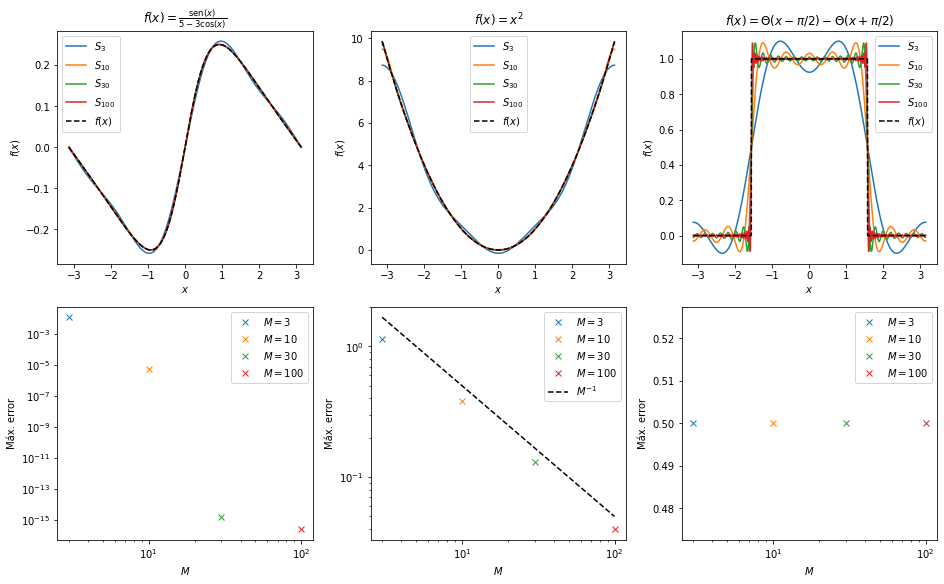

In [ ]:
#@title Cálculo de sumas parciales de Fourier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

MS = np.array([3, 10, 30, 100])

x = np.linspace(-np.pi, np.pi, 10000, endpoint=False)

def modo_trig(m):
    if m == 0:
        return 0
    else:
        return -np.sign(m)*1j/(3**(np.abs(m)+1))

f_trig = np.sin(x)/(5-3*np.cos(x))


def modo_cuad(m):
    if m == 0:
        return np.pi**2/3
    else:
        return 2*(-1)**m/m**2
f_cuad = x**2


def modo_rect(m):
    if m == 0:
        return 1/2
    else:
        return np.sin(m*np.pi/2)/(m*np.pi)

f_rect = np.zeros_like(x)
f_rect[np.abs(x) < np.pi/2] = 1
# Ajusto el valor sobre la discontinuidad para que sea 1/2
mascara_punto_medio = np.not_equal(np.roll(f_rect,-1), f_rect)
f_rect[mascara_punto_medio] = 1/2

fig, axs = plt.subplots(2,3, figsize=(13,8), constrained_layout=True)
for M in MS:
    F_trig = np.zeros_like(x, dtype=np.complex128)    
    F_cuad = np.zeros_like(x, dtype=np.complex128)
    F_rect = np.zeros_like(x, dtype=np.complex128)
    for m in range(-M, M+1):
        F_trig = F_trig + modo_trig(m)*np.exp(1j*m*x)        
        F_cuad = F_cuad + modo_cuad(m)*np.exp(1j*m*x)
        F_rect = F_rect + modo_rect(m)*np.exp(1j*m*x)

    F_trig = np.real(F_trig)
    error_trig = np.max(np.abs(F_trig - f_trig))
    axs[0,0].plot(x, F_trig, label=f"$S_{{{M}}}$")
    axs[1,0].loglog(M, error_trig, 'x', label=f"$M={M}$")

    F_cuad = np.real(F_cuad)
    error_cuad = np.max(np.abs(F_cuad - f_cuad))
    axs[0,1].plot(x, F_cuad, label=f"$S_{{{M}}}$")
    axs[1,1].loglog(M, error_cuad, 'x', label=f"$M={M}$")

    F_rect = np.real(F_rect)
    error_rect = np.max(np.abs(F_rect - f_rect))
    axs[0,2].plot(x, F_rect, label=f"$S_{{{M}}}$")
    axs[1,2].semilogx(M, error_rect, 'x', label=f"$M={M}$")

axs[0,0].plot(x, f_trig, "--k", label="$f(x)$")

axs[0,1].plot(x, f_cuad, "--k", label="$f(x)$")
axs[1,1].plot(MS, 5*MS**-1.0, "--k", label="$M^{-1}$")

axs[0,2].plot(x, f_rect, "--k", label="$f(x)$")

[ax.set_xlabel("$x$") for ax in axs[0,:]]
[ax.set_ylabel("$f(x)$") for ax in axs[0,:]]

[ax.set_xlabel("$M$") for ax in axs[1,:]]
[ax.set_ylabel("Máx. error") for ax in axs[1,:]]

[ax.legend() for ax in axs.flatten()]
axs[1,2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

axs[0,0].set_title(r"$f(x)=\frac{\mathrm{sen}(x)}{5-3\cos(x)}$")
axs[0,1].set_title(r"$f(x)=x^2$")
axs[0,2].set_title(r"$f(x)=\Theta(x-\pi/2) - \Theta(x+\pi/2)$");

Si bien la convergencia (es decir que tan rápido decrecen los $\hat a_m$) puede verse directamente de las expresiones, vemos que efectivamente la tasa de convergencia en cada caso obedece las reglas generales que establecimos arriba.

Para la primer función, vemos una convergencia extremadamente rápida, al punto que para solo $30$ modos ya nos encontramos con las limitaciones de la aritmética de punto flotante. Por otro lado, para el caso de la segunda función, que presenta una derivada no periódica, vemos que la convergencia es de primer orden. Finalmente, para el caso discontinuo vemos una convergencia lenta lejos de los puntos de discontinuidad, mientras que en un entorno de los mismos no hay convergencia, como muestra el error constante. Adicionalmente, vemos para este caso la presencia de oscilaciones alrededor de la discontinuidad. Esto es conocido como [_fenómeno de Gibbs_](https://es.wikipedia.org/wiki/Fen%C3%B3meno_de_Gibbs) o _ringing_. Este tipo de oscilaciones pueden resultarnos de interés porque cuando las encontramos en una solución numérica pueden estar indicando que la solución buscada es discontinua, o bien que precisamos una mayor resolución a efectos de resolver un gradiente de gran magnitud.

Un detalle interesante que podemos ver gráficamente, es que en presencia del fenómeno de Gibbs el salto alrededor de la discontinuidad que obtenemos por utilizar una cantidad finita de modos es $\approx 18\%$ mayor que el que presenta la función real, independientemente de la cantidad de modos utilizados. Noten que todas las curvas coloreadas en la tercer columna presentan escencialmente la misma amplitud cerca de la discontinuidad.

Para quienes quieran un bosquejo de demostración, la tasa de convergencia para funciones _comunes_ surge naturalmente de considerar que si $f(x)$ es $C^P$ y $P-1$ veces periódica, entonces integrando por partes tenemos
\begin{equation*}
    \hat{a}_m = \frac{1}{L} \int_{0}^{L} f(x) e^{-i \frac{2\pi}{L} m x} \mathrm d x = \frac{1}{L} \left(\frac{L}{2 \pi m}\right)^P \int_{0}^{L} f^{(P)}(x) e^{-i \frac{2\pi}{L} m x} \mathrm d x,
\end{equation*}
donde los términos de borde se anulan $P$ veces por la periodicidad. Luego si $f^{(P)}$ es no periódica la integral resultante irá como $1/m$, dando un orden de convergencia $M^{-P}$ para las sumas parciales.

### **Cálculo de derivadas con FFT**

Luego de establecer qué tipo de funciones vamos a poder representar y qué tan bien funcionarán dichas aproximaciones en la práctica, podemos concentrarnos en nuestro principal interés para el uso de expansiones trigonométricas: el cálculo de derivadas.

Esto va a resultar muy sencillo puesto que las funciones de tipo $e^{ikx}$ son autofunciones del operador de derivación. En otras palabras
\begin{equation*}
    \frac{\mathrm d }{\mathrm d x} e^{ikx} = (ik) e^{ikx}.
\end{equation*}
Luego, en caso que nuestra suma de Fourier presente buenas propiedades de convergencia, tendremos que
\begin{align*}
    f'(x) = \frac{\mathrm d}{\mathrm d x} \left[ f(x) \right] & \approx \frac{\mathrm d}{\mathrm d x} \left[ \sum_{m=-M}^{M} \hat f_m e^{ik_m x} \right] \\
    &= \sum_{m=-M}^{M} (ik_m \hat f_m) e^{ik_m x} = \sum_{m=-M}^{M} \hat f'_m e^{ik_m x}.
\end{align*}
Es decir, tenemos una serie de Fourier para $f'$, cuyos coeficientes pueden obtenerse a partir de aquellos para $f$ sencillamente como $\hat f'_m = ik_m \hat f_m$.

La forma práctica de usar esto para calcular derivadas a partir de un conjunto de valores $\mathbf f = (f_0, f_1, \ \dots \ , f_{N-1})$ pasando por el dominio espectral es la siguiente:
1. Se calcula la FFT de $\mathbf f$, obteniendo el conjunto de coeficientes $\hat{\mathbf f} = (\hat f_0, \hat f_1, \ \dots \ , \hat f_{N-1})$.
2. Se arma la grilla espectral $\mathbf k = (k_0, k_1, \ \dots \ , k_{N-1})$.
3. Se obtienen los coeficientes para la derivada $q$-ésima de $\mathbf f$ mediante $(i \mathbf k)^{\{q\}} \circ \hat{\mathbf f}$, donde $^{\{ \}}$ denota la potenciación elemento a elemento y $\circ$ la multiplicación elemento a elemento.
4. Se calcula la IFFT de $\hat{\mathbf f}^{(q)}$, obteniendo la derivada $q$-ésima en el espacio físico: $\mathbf f^{(q)} = (f_0^{(q)}, f_1^{(q)}, \ \dots \ , f_{N-1}^{(q)})$.

Con esto podemos obtener derivadas muy precisas (para funciones cuya serie de Fourier presente convergencia rápida) en $\mathcal{O}(N \log (N))$ operaciones.

<b> Sobre los números de onda </b>

Si bien es posible considerar a los números de onda enteramente positivos, de forma de que discreticen el dominio angular $[0, 2\pi/ \Delta x)$ es más común, tanto para la presentación de resultados como para los cálculos, considerar números de onda definidos en $[-\pi/\Delta x, \pi/\Delta x)$. Sin bien esta última forma resulta más simétrica (además que permite visualizar más rápidamente qué modos están correctamente resueltos), deben tener en cuenta que en caso que $N$ sea par se tendrán $N/2$ números de onda negativos y $N/2 -1$ números de onda positivos. Para el caso de $N$ impar se tienen la misma cantidad de modos negativos y positivos.

### **FFT en Python**

<font size="small">
(Esta subsección está adaptada de aquella presentada oportunamente en la Práctica 3)

Resulta extremadamente sencillo calcular la FFT de una cierta señal en Python. Existen numerosos paquetes que realizan esta tarea, sin embargo nos concentraremos en la interfaz brindada por [`numpy.fft`](https://numpy.org/doc/stable/reference/routines.fft.html).

Para esto podemos usar la función [`numpy.fft.fft`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft) que calcula la descomposición de Fourier en una dimensión de un arreglo. En caso que dicho arreglo posea más de una dimensión, podemos seleccionar sobre cuál queremos realizar la transformada mediante el argumento `axis`. Por ejemplo, dado un arreglo `f[i,j]` donde el índice `i` corresponde a distintos tiempos y `j` a distintas posiciones en el espacio, podemos calcular la transformada de Fourier en espacio como `numpy.fft.fft(f, axis=1)`.

Como notarán, y conforme a lo que mencionamos anteriormente, no es necesario contar con información sobre el espaciamiento entre puntos para calcular la FFT, basta con que sean equiespaciados. Sin embargo, está información sí resulta necesaria para interpretar los valores $\hat{f}_m$ como el contenido espectral asociado al número de onda $k_m$. Numpy nos ofrece la función [`numpy.fft.fftfreq`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html) (donde freq denota frecuencia, el equivalente temporal al número de onda). Por ejemplo, si la señal original (en el espacio $x$) tenía `N` puntos y un espaciamiento `dx`, podemos obtener el vector $\mathbf k$ como `2*numpy.pi*numpy.fft.fftfreq(N, d=dx)`. El factor de $2\pi$ interviene para expresar a los números de onda en unidades de $\text{rad}/\text{m}$ en lugar de $1/\text{m}$.

Dado un arreglo de $N$ cantidades (reales o complejas), `numpy.fft.fft` devuelve un arreglo de $N$ **cantidades complejas**. Adicionalmente, adopta la convención de que devuelve primero el espectro correspondiente al número de onda $k_m=0$, seguido de los elementos asociados a $k_m>0$ y finalmente aquellos asociados a $k_m < 0$. Este ordenamiento, por consistencia, es también seguido por `numpy.ffy.fftfreq`.

Veamos un código que calcula el espectro de amplitud $|\hat f(k_m)|$ y de fase $\theta_m = \arctan[\mathrm{Im}\{\hat f(k_m)\}/\mathrm{Re}\{\hat f(k_m)\}]$ de la función $f(x) = \mathrm{sen}(x) + \mathrm{sen}(9x)$, que es $2\pi$-periódica. Esperamos que la amplitud presente picos para $|k|=1$ y $|k|=9$. Veamos que efectivamente es así:

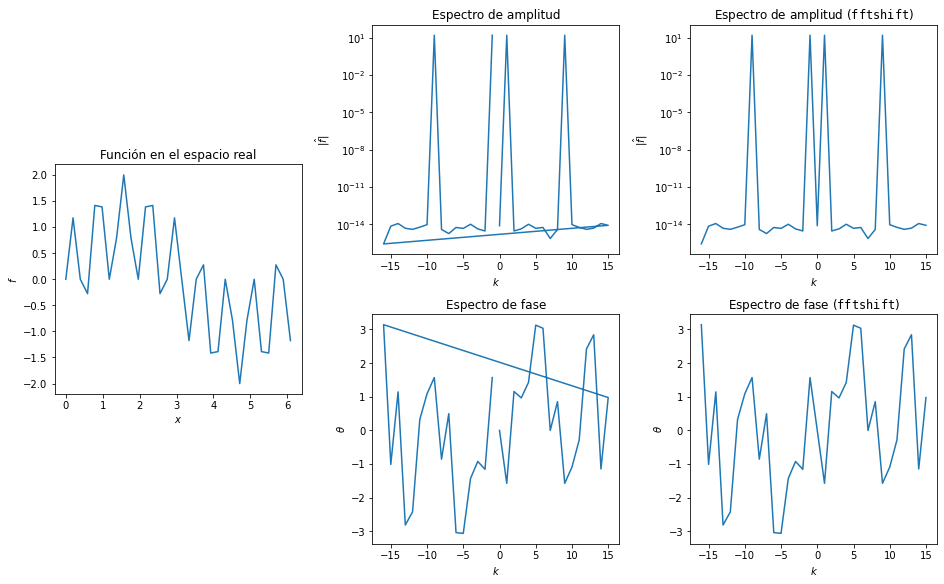

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

N = 32                                                      # Número de puntos
L = 2*np.pi                                                 # Tamaño del dominio
x, dx = np.linspace(0, L, N, endpoint=False, retstep=True)  # Grilla espacial
f = np.sin(x) + np.sin(9*x)                                 # Función objetivo

k = 2*np.pi*np.fft.fftfreq(N, d=dx)       # Grilla espectral
F = np.fft.fft(f)                         # Transformada de Fourier

amp = np.abs(F)                           # Amplitud
fas = np.arctan2(np.imag(F), np.real(F))  # Fase

# Figura (con un par de ejes abarcando dos filas)
fig = plt.figure(figsize=(13,8), constrained_layout=True)
gs  = gridspec.GridSpec(4, 3, figure=fig)
ax0 = plt.subplot(gs[1:3, 0])
ax1 = plt.subplot(gs[ :2, 1])
ax2 = plt.subplot(gs[ :2, 2])
ax3 = plt.subplot(gs[2: , 1])
ax4 = plt.subplot(gs[2: , 2])

ax0.plot(x, f)
ax0.set_title("Función en el espacio real")
ax0.set_xlabel("$x$")
ax0.set_ylabel("$f$")

ax1.semilogy(k, amp)
ax1.set_title("Espectro de amplitud")
ax1.set_xlabel("$k$")
ax1.set_ylabel("$|\hat f|$")

ax2.semilogy(np.fft.fftshift(k), np.fft.fftshift(amp))
ax2.set_title("Espectro de amplitud ($\mathtt{fftshift}$)")
ax2.set_xlabel("$k$")
ax2.set_ylabel("$|\hat f|$")

ax3.plot(k, fas)
ax3.set_title("Espectro de fase")
ax3.set_xlabel("$k$")
ax3.set_ylabel(r"$\theta$")

ax4.plot(np.fft.fftshift(k), np.fft.fftshift(fas))
ax4.set_title("Espectro de fase ($\mathtt{fftshift}$)")
ax4.set_xlabel("$k$")
ax4.set_ylabel(r"$\theta$");

Noten que en la columna del medio los gráficos presentan una discontinuidad cerca del 0 y una línea un tanto extraña que conecta los valores en los extremos de los intervalos. Esto se debe a que, como mencionabamos antes, Numpy organiza las cantidades de manera que primero aparecen los números de onda positivos y luego los negativos, generando estas discontinuidades al graficar. Para subsanar esto, podemos utilizar la función `numpy.fft.fftshift` que reacomoda los valores para que aparezcan primero aquellos asociados a $k < 0$ y luego aquellos con $k > 0$, quedando $k=0$ en el medio. Esta operación debemos realizarla tanto para el vector `k` como para el vector `F` (o para cualquier cantidad derivada del mismo), de manera que su orden siga siendo consistente.

Reparen además en que $|f(k_m)|$ es simétrico con respecto al origen, mientras que $\theta_m$ es antisimétrico. Esto obedece a una simetría presente en $\hat f$ cuando $f$ es real. Existen funciones que aprovechan esta simetría para disminuir el costo de cómputo y de almacenamiento de las FFTs de funciones reales. Estas funcionalidades pueden accederse mediante las interfaces [`numpy.fft.rfft`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html#numpy.fft.rfft) y [`numpy.fft.rfftfreq`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfftfreq.html#numpy.fft.rfftfreq). Sin embargo, dado que los ahorros que proporcionan no serán determinantes para la realización de esta práctica, no será necesario que las empleen.

Para realizar la transformación inversa, Numpy prove [`numpy.fft.ifft`](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html), que se usa de la misma manera que la transformada directa. Noten, sin embargo, que `ifft` devuelve un arreglo de números complejos, por lo que si quieren la parte real del mismo, deben utilizar [`numpy.real()`](https://numpy.org/doc/stable/reference/generated/numpy.real.html). Veamos un ejemplo:

In [ ]:
import numpy as np

f  = np.arange(0,15)**2
F  = np.fft. fft(f)
fb = np.fft.ifft(F)

print("Tipo de arreglo después de la IFFT:", fb.dtype)
print("Igualdad entre las partes reales antes y después de transformar:",
      np.all(np.isclose(f, np.real(fb))))

Tipo de arreglo después de la IFFT: complex128
Igualdad entre las partes reales antes y después de transformar: True


### **Solapamiento (_aliasing_)**

Un tópico que no mencionamos hasta el momento es aquel relacionado con la resolución necesaria para poder reproducir fidedignamente una función mediante una serie de Fourier truncada, i.e. mediante una transformada discreta de Fourier.

En cierta manera ya hemos respondido implícitamente a este interrogante. Afirmamos más arriba que los números de onda que podemos resolver con nuestra grilla espectral están dados por $k \in (-\pi/\Delta x, \pi/\Delta x)$. Si pensamos en términos de longitudes de onda, la longitud de onda más corta que podemos resolver $\lambda$ está dada por
\begin{equation*}
\lambda_{\text{min}} = \frac{2\pi}{\max(|k|)} = 2\Delta x.
\end{equation*}
Dicho de otra manera, para poder representar adecuadamente una onda $\mathrm{sen}(x/(2\pi\lambda))$, precisamos contar más de 2 muestras por longitud de onda. Este resultado es conocido como [Teorema de muestreo](https://es.wikipedia.org/wiki/Teorema_de_muestreo_de_Nyquist-Shannon)$^\dagger$.

Veamos computacionalmente que sucede si no cumplimos con este requisito:

<font size="small">
$^\dagger$: Este problema fue estudiado por Claude Shannon, quien mostró matemáticamente resultados experimentales de telegrafía comunicados previamente por Harry Nyquist. Por ese motivo a veces se nombra a este teorema como <i>Teorema de muestreo de Nyquist-Shannon</i>.

In [ ]:
#@title **Verificación computacional del aliasing**
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout
from IPython.display import display

lamda = 1/8

x, dx = np.linspace(0, 1, 10000, endpoint=False, retstep=True)

f = np.sin(2*np.pi*x/lamda) + 1
F = np.fft.fftshift(np.abs(np.fft.fft(f)))**2/10000**2
k = np.fft.fftshift(2*np.pi*np.fft.fftfreq(x.size, dx))

def anim(ppw):
    dxm = lamda/ppw
    nxm = int(round(1/dxm))

    xm = np.arange(0, nxm+1)*dxm
    fm = np.sin(xm*2*np.pi/lamda) + 1
    FM = np.fft.fftshift(np.abs(np.fft.fft(fm)))**2/nxm**2
    km = np.fft.fftshift(2*np.pi*np.fft.fftfreq(xm.size, dxm))

    fig, axs = plt.subplots(2, 1, figsize=(12,6), constrained_layout=True)
    fig.suptitle(f"$\lambda = {lamda/dxm:.3f} \Delta x$")
    axs[0].plot(x , f , 'k')
    axs[0].plot(xm, fm, '-x', c="C1")
    axs[0].set_xlabel("$x$")
    axs[0].set_ylabel("$f$")

    axs[1].plot(k , F , 'ok')
    axs[1].plot(km, FM, 'o', c="C1")
    axs[1].set_xlim(-3*np.pi/lamda, 3*np.pi/lamda)
    axs[1].set_xlabel("$k$")
    axs[1].set_ylabel("$|\hat f|^2$")

    plt.show()

slider = FloatSlider(
    value=4,
    min=1,
    max=4,
    step=0.1,
    description="Puntos por longitud de onda",
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
    layout=Layout(width='auto'),
    style= {'description_width': 'initial'}
)

interact(anim, ppw=slider);

interactive(children=(FloatSlider(value=4.0, description='Puntos por longitud de onda', layout=Layout(width='a…

La figura interactiva permite muestrear una función, en este caso un seno con una cierta longitud de onda, con una cantidad variable de puntos por muestra. El panel superior muestra el efecto del muestreo, mientras que el inferior muestra el espectro de potencias (i.e. la magnitud de los $\hat f (k_m)$). 

Vemos que si muestreamos nuestra función con más de dos puntos por longitud de onda, el espectro queda correctamente resuelto. En el espacio físico también vemos que una estimación del período de la función naranja coincide con la de la función real (en negro). Sin embargo, cuando empezamos a tener menos de dos muestras por longitud de onda, el período de la curva naranja empieza a ser distinto que el de la curva negra. En el espacio de Fourier, esto lo vemos con picos en el espectro de potencias que en lugar de estar en $k = 50$, aparecen para valores menores de $k$. En particular, cuando tenemos 3 muestras cada dos longitudes de onda $\Delta x = 3 \lambda/2$, vemos una duplicación del período.

Sin embargo, esto es un problema, ya que si no conocemos $f$, un mal muestreo puede resultar en que veamos energía en escalas que nuestro problema no tiene. Más aún, esta energia _espuria_ se vuelve indistinguible de la energía que realmente corresponde a dicho modo. Veamos un ejemplo para la función $f(x) = \mathrm{sen}(2x) + \mathrm{sen}(32x)$, con un muestreo que no alcanza a resolver el modo asociado al segundo término:

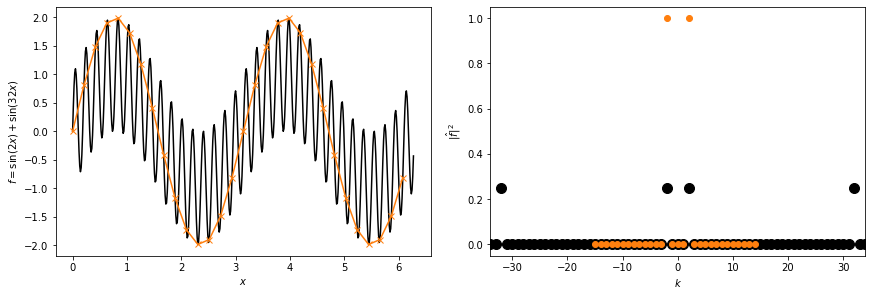

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

NX = 30
k  = 2

SS = 16

x1, dx1 = np.linspace(0, 2*np.pi,    NX, endpoint=False, retstep=True)
x2, dx2 = np.linspace(0, 2*np.pi, SS*NX, endpoint=False, retstep=True)

f1 = np.sin(k*x1) + np.sin(16*k*x1)
f2 = np.sin(k*x2) + np.sin(16*k*x2)

F1 = np.fft.fftshift(np.abs(np.fft.fft(f1)))**2/NX**2
F2 = np.fft.fftshift(np.abs(np.fft.fft(f2)))**2/(SS*NX)**2

k1 = np.fft.fftshift(2*np.pi*np.fft.fftfreq(x1.size, dx1))
k2 = np.fft.fftshift(2*np.pi*np.fft.fftfreq(x2.size, dx2))

fig, axs = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True)
axs[0].plot(x2, f2, 'k')
axs[0].plot(x1, f1, '-x', c="C1")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel(f"$f = \mathrm{{sin}}({k}x) + \mathrm{{sin}}({16*k}x)$")

axs[1].plot(k2, F2, 'ok', markersize=10)
axs[1].plot(k1, F1, 'o', c="C1")
axs[1].set_xlim(-17*k, 17*k)
axs[1].set_xlabel("$k$")
axs[1].set_ylabel("$|\hat f|^2$");


Si solo tuvieramos la información en naranja, concluiriamos que hay mucha más energía sociada al modo $k=2$ de la que nuestra señal realmente tiene. Esto es debido a que, por el fenómeno de _aliasing_, se nos está mezclando la energía correspondiente a $k=2$ con aquella para $k=32$.

#### **Aliasing no-lineal**

De la discusión previsa surge que para resolver numéricamente un problema con un método de Fourier$^\dagger$ debemos contar con una grilla que provea más de dos puntos de grilla por longitud característica del problema. En caso que existan varias longitudes características, debemos representar correctamente la menor de ellas. Para problemas lineales esto implica sencillamente que debemos elegir un valor de $N$ apropiado para nuestra grilla.

Sin embargo, los problemas no-lineales dependientes del tiempo introducen una dificultad adicional, y es que en cada paso se introducen armónicos de orden superior. Para ver fácilmente esto basta considerar $\mathrm{sen}^2(x) = (1 - \cos(2x))/2$. La consecuencia de esto es que, si la integración temporal es suficientemente larga, no importa la resolución que usemos siempre vamos a terminar con energía de armónicos superiores, que no resolvemos correctamente, mezclada en nuestra grilla, por efecto del _aliasing_$^\ddagger$.

La estrategia para que, dado un cierto número de onda máximo $k_\text{máx}$ (o lo que es lo mismo, una cierta resolución espacial $N$) podamos asegurar que la energía presente en nuestra solución corresponde realmente a los armónicos $(-k_\text{máx}, k_\text{máx})$ es utilizar un filtro. Lo más sencillo es realizar los cálculos con una resolución mayor a la que nos interesa, $N'$, que dará lugar a un correspondiente $k'_\text{máx}$. Luego, si elegimos correctamente $k'_\text{máx}$ para que los términos no-lineales queden correctamente resueltos (i.e. no tengan _aliasing_), basta con eliminar todos los modos tales que $|k_\text{máx}| < k < |k'_\text{máx}|$.

Si bien la solución mencionada requiere un mayor costo computacional (terminamos con grillas espaciales más finas de lo que efectivamente resolvemos), nos permite resolver el solucionar del aliasing de manera **exacta**. Existen otras técnicas que buscan minimizar la amplitud del _aliasing_ no-lineal por debajo de un cierto umbral prefijado, no veremos técnicas de este tipo.

**Para no-linealidades cuadráticas** (como la que aparece en la ecuación de Navier-Stokes incompresible), basta con escoger
\begin{equation*}
    k'_\text{máx} = \frac{3}{2} k_\text{máx},
\end{equation*}
esquema conocido como [**_regla de los tres medios_**](https://journals.ametsoc.org/view/journals/atsc/28/6/1520-0469_1971_028_1074_oteoai_2_0_co_2.xml). A este filtrado se lo denomina también **_regla de los dos tercios_**. El origen de este segundo nombre surge de pensar la misma situación pero al revés, se tiene una grilla de $N$ puntos con un cierto $k_\text{máx}$, para evitar el aliasing debo anular los modos para todos los $k$ tales que
\begin{equation*}
    |k| > \frac{2}{3} k_\text{máx},
\end{equation*}
y por lo tanto las escalas que voy a resolver en mi simulación son aquellas menores a $2 k_\text{máx}/3$.

La forma de hacer esto computacionalmente es utilizar el cuadrado de los  números de onda normalizados
\begin{equation*}
    \tilde{k}_m^2 = \frac{k_m^2}{\max(k_m^2)}.
\end{equation*}
Luego basta con imponer
\begin{equation*}
    \hat{f}_m = 0 \qquad \qquad \forall \ m: \tilde{k}^2_m > \frac{4}{9}.
\end{equation*}

Esta tarea puede realizarse fácilmente en Python mediante el uso de máscaras. Por ejemplo, mediante el código
```python
    kn = k**2 / np.max(np.abs(k))**2
    F[kn > 4/9] = 0
```
donde `k` es un vector que contiene a los números de onda y `F` uno complejo que contiene a una serie de coeficientes $\hat{f}_m$.

Finalmente, vale resaltar que el aliasing no-lineal no afecta a los métodos de tipo Galerkin (aquellos que resuelven solo en el dominio espectral, sin pasar por el dominio real). Sin embargo, en los mismos, el costo de calcular términos no-lineales escala como $\mathcal{O}(N^\ell)$, con $\ell$ el grado de la no-linealidad, mientras que en el método pseudo-espectral (que calcula no-linealidades en el espacio físico), el costo es $\ell \mathcal O (N \log N)$.

<font size="small">
$^\dagger$ y $^\ddagger$: Si bien no lo hicimos explicito, limitaciones similares afectan a los métodos de diferencias finitas o volúmenes finitos.

In [ ]:
#@title **Verificación computacional de la regla de los 2/3**
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, Layout
from IPython.display import display

N = 32

x1, dx1 = np.linspace(0, 2*np.pi,   N, endpoint=False, retstep=True)
x2, dx2 = np.linspace(0, 2*np.pi, 2*N, endpoint=False, retstep=True)

k1 = np.fft.fftshift(2*np.pi*np.fft.fftfreq(x1.size, dx1))
k2 = np.fft.fftshift(2*np.pi*np.fft.fftfreq(x2.size, dx2))

kmax = np.max(np.abs(k1))
def anim(a, b):
    f1 = np.sin(a*x1)*np.sin(b*x1)
    f2 = np.sin(a*x2)*np.sin(b*x2)

    F1 = np.fft.fftshift(np.abs(np.fft.fft(f1))**2/N**2)
    F2 = np.fft.fftshift(np.abs(np.fft.fft(f2))**2/N**2/4)

    fig, ax = plt.subplots(1, 1, figsize=(12,6), constrained_layout=True)
    fig.suptitle("Espectro de $\sin(k_rx)\sin(k_sx)$")
    ax.set_title(f"$k_r={a/kmax:.2f}\ k_\mathrm{{máx}}$ "
                f"y $k_s={b/kmax:.2f}\ k_\mathrm{{máx}}$")
    ax.plot(k1, F1, 'o', color="C1")
    ax.plot(k2, F2, 'x', color="k")

    align = {"ha": "center", "va": "center"}

    ax.plot(a, F1.max()/2, 's', markersize=10, color="C2", label="$k_r$", alpha=0.4)
    ax.plot(b, F1.max()/2, 'd', color="C6", label="$k_s$")

    ax.vlines(k1.max(), F1.min(), .95*F1.max(), linestyle="--", color="C1")
    ax.vlines(k1.min(), F1.min(), .95*F1.max(), linestyle="--", color="C1")
    ax.text(k1.max(), F1.max(), r"$k_\mathrm{máx}$", **align, color="C1")
    ax.text(k1.min(), F1.max(), r"$k_\mathrm{máx}$", **align, color="C1")

    ax.vlines(2*k1.max()/3, F1.min(), .95*F1.max(), linestyle="--", color="r")
    ax.vlines(2*k1.min()/3, F1.min(), .95*F1.max(), linestyle="--", color="r")
    ax.text(2*k1.max()/3, F1.max(), r"$\frac{2}{3} k_\mathrm{máx}$",
            **align, color="r")
    ax.text(2*k1.min()/3, F1.max(), r"$\frac{2}{3} k_\mathrm{máx}$",
            **align, color="r")
    ax.set_xlabel("$k$")

    ax.legend()

    plt.show()

slider_a = IntSlider(
    value=1,
    min=1,
    max=N/2-1,
    step=1,
    description="kᵣ=",
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    layout=Layout(width='auto'),
    style= {'description_width': 'initial'}
)

slider_b = IntSlider(
    value=1,
    min=1,
    max=N/2-1,
    step=1,
    description="kₛ=",
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    layout=Layout(width='auto'),
    style= {'description_width': 'initial'}
)

interact(anim, a=slider_a, b=slider_b);

interactive(children=(IntSlider(value=1, description='kᵣ=', layout=Layout(width='auto'), max=15, min=1, style=…

El código superior muestra qué sucede cuando interactúan de manera cuadrática dos modos $k_r$ y $k_s$. En naranja vemos el resultado numérico, mientras que en negro vemos un espectro que podemos considerar verdadero (computado en una grilla lo suficientemente grande para evitar cualquier tipo de aliasing). Vemos que para $k_r > k_\text{máx}/2$ y $k_s > k_\text{máx}/2$ empezamos a ver aliasing, i.e., en nuestro espectro naranja vemos energía en un número de onda menor al real (en negro).

Moviendo los deslizadores, podemos hallar que si queremos retener la mayor cantidad de valores $k_r$ y $k_s$ de manera que el resultado de $\mathrm{sen}(k_rx)\mathrm{sen}(k_sx)$ pueda presentar aliasing solo en la región $|k| > \max\{|k_r|, |k_s|\}$, necesariamente ese límite debe ser $|k_\text{crít}| = \max \{|k_r|, |k_s|\} = 2|k_\text{máx}|/3$. Luego, si esto se verifica, basta con filtrar para $|k| > |k_\text{crít}|$ al resultado de una no-linealidad cuadrática para resolver a la misma sin aliasing.

### **Series de Fourier en 2D**

Las ideas mencionadas anteriormente resultan fáciles de generalizar a dos dimensiones espaciales. Vamos a querer expresar nuestra función como
\begin{equation*}
f_{pq} = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} \hat{\hat{f}}_{mn} e^{-i (k^x_m x_p + k^y_n y_q)} = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} \hat{\hat{f}}_{mn} e^{-i \boldsymbol{k}_{mn} \cdot \boldsymbol r_{pq}},
\end{equation*}
con $\boldsymbol r = (x, y)$ el vector posición y $\boldsymbol k$ el vector número de onda $(k^x, k^y)$. Naturalmente, la discretización en cada dirección es independiente, resultando $k^x_m = m 2\pi/L_x$ y $k^y_n = n 2\pi/L_y$.

El proceso para obtener los coeficientes $\hat{\hat f}_{mn}$ podemos pensarlo como un proceso escalonado, donde primero obtenemos, por ejemplo, $\hat{f_m} (y_n)$ y luego $\hat{\hat f}_{mn}$, como indica el siguiente esquema:
\begin{equation*}
    f(x_p, y_q) \quad \overset{\text{TDF en }x}{\rightarrow} \quad \hat f(k^x_m, y_m) \quad \overset{\text{TDF en }y}{\rightarrow} \quad \hat{\hat f} (k^x_m, k^y_n).
\end{equation*}

Para alivianar la notación, en adelante utilizaremos un único $\hat{}$ para denotar coeficientes de Fourier, mientras que la cantidad de transformadas realizadas se desprenderá de los índices que acompañan a $\hat f$.

Sobre la convergencia, solo mencionaremos que siguen valiendo las mismas observaciones generales que realizamos para el caso 1D.

#### **Derivadas en 2D**

Resulta muy sencillo obtener derivadas a partir de $\hat f_{nm}$. Para ello, vamos a usar las siguientes representaciones matriciales de $N_x \times N_y$
\begin{align*}
\hat{\mathbb{F}} &= \begin{pmatrix}
\hat f_{0,0} & \hat f_{0,1} & \dots & \hat f_{0, N_y-1} \\
\hat f_{1,0} & \hat f_{1,1} & \dots & \hat f_{1, N_y -1} \\
\vdots & \vdots & \ddots & \vdots \\
\hat f_{N_x-1,0} & \hat f_{N_x-1,1} & \dots & \hat f_{1, N_y -1}
\end{pmatrix}\\
\mathbb{K}_x &= \begin{pmatrix}
k^x_0 & k^x_0 & \dots & k^x_0 \\
k^x_1 & k^x_1 & \dots & k^x_1 \\
\vdots & \vdots & \ddots & \vdots \\
k^x_{N_x-1} & k^x_{N_x-1} & \dots & k^x_{N_x-1}
\end{pmatrix} = \begin{pmatrix}
\rule[-1ex]{1.5pt}{2.5ex} & \rule[-1ex]{1.5pt}{2.5ex} & \dots & \rule[-1ex]{1.5pt}{2.5ex} \\
\mathbf{k}^x & \mathbf{k}^x & \dots & \mathbf{k}^x \\ 
\rule[-1ex]{1.5pt}{2.5ex} & \rule[-1ex]{1.5pt}{2.5ex} & \dots & \rule[-1ex]{1.5pt}{2.5ex}
\end{pmatrix} \\
\mathbb{K}_y &= \begin{pmatrix}
k^y_0 & k^y_1 & \dots & k^y_{N_y-1} \\
k^y_0 & k^y_1 & \dots & k^y_{N_y-1} \\
\vdots & \vdots & \ddots & \vdots   \\
k^y_0 & k^y_1 & \dots & k^y_{N_y-1}
\end{pmatrix} = \begin{pmatrix}
\rule{2.5ex}{1.5pt} & \mathbf{k}^y & \rule{2.5ex}{1.5pt} \\
\rule{2.5ex}{1.5pt} & \mathbf{k}^y & \rule{2.5ex}{1.5pt} \\
\vdots & \vdots & \vdots \\
\rule{2.5ex}{1.5pt} & \mathbf{k}^y & \rule{2.5ex}{1.5pt}
\end{pmatrix}\\
\end{align*}

Luego, el resultado de derivar $r$ veces con respecto a $x$ y $s$ veces con respecto a $y$ puede expresarse en el dominio espectral como
\begin{equation*}
    \hat{\mathbb{F}}^{(r)(s)} = (i \mathbb K^x)^{\{r\}} \circ (i \mathbb K^y)^{\{s\}} \circ \hat{\mathbb F}
\end{equation*}
y antitransformando $\hat{\mathbb F}^{(r)(s)}$ se obtiene $\mathbb F^{(r)(s)}$, que es la matriz que contiene a los elementos $(\partial^r_x \partial^s_y f)_{pq}$.

Vale resaltar que en caso que solo se busque derivar con respecto a $x$ o a $y$, basta con realizar transformadas y antitransformadas solo en la dirección deseada, procediéndose a derivar en el espacio mixto. Por ejemplo, en caso que se desee derivar solo con respecto a $x$, puede hacerse en el dominio $\hat f (k^x, y)$. Esto permite disminuir el computo necesario. Sin embargo en caso que no quede claro como realizarlo, no se preocupen y realicen las derivadas en el dominio espectral $\hat f (k^x, k^y)$, luego de hacer una transformada de Fourier 2D.

#### **Aliasing no-lineal en 2D**

Para remover el aliasing no-lineal en dimensiones superiores, por ejemplo para el caso 2D, podemos sencillamente utilizar el mismo concepto de número de onda normalizado pero ahora considerando cada componente de $\boldsymbol k$:
\begin{equation*}
    \tilde k_{mn}^2 = \frac{(k^x_m)^2}{\max [(k^x_m)]} + \frac{(k^y_m)^2}{\max [(k^y_m)^2]},
\end{equation*}
y filtrando de forma tal que
\begin{equation*}
    \hat{f}_{mn} = 0 \qquad \qquad \forall \ (m,n): \tilde k_{mn}^2 > \frac{4}{9}. 
\end{equation*}

#### **FFT 2D en Python**


Para calcular la serie de Fourier 2D en Python podemos sencillamente utilizar dos transformadas 1D encadenadas, variando el argumento `axis` de `numpy.fft.fft`. Por ejemplo, dado un arreglo `f[x,y]` podríamos hacer algo como lo siguiente:
```python
# Obtener F = f(kx,ky)
F = numpy.fft.fft(numpy.fft.fft(f, axis=0), axis=1)
```

Sin embargo, las interfaces de `numpy.fft` tienen una función que realiza la transformada de Fourier 2D sobre el par de ejes solicitados. La misma puede accederse mediante `numpy.fft.fft2` y admite un argumento `axes` que permite especificar sobre que par de ejes desea realizarse la transformada de Fourier. Por ejemplo, si tenemos un arreglo `f[t,x,y]` y queremos obtener la transformada de Fourier 2D espacial para cada tiempo, podemos usar sencillamente
```python
# Obtener F = f(t, kx, ky)
F = numpy.fft.fft2(f, axes=(1,2))
```

Para los números de onda, deberemos generar cada vector por separado, por ejemplo mediante
```python
kx = np.fft.fftfreq(Nx, dx)
ky = np.fft.fftfreq(Ny, dy)
```

## **Método de Chebyshev**

Como mostramos anteriormente, las series de Fourier son una herramienta poderosa para el desarrollo de métodos numéricos. Sin embargo, a diferencia de lo que sucede en el tratamiento analítico, su uso computacional requiere emplear una cantidad finita de modos. Esto deteriora la calidad de las aproximaciones en caso que nuestro problema no tenga una buena cantidad de derivadas suaves y periódicas.

Por otro lado, muchos problemas físicos presentan condiciones de contorno que no son periódicas. Esto no quiere decir que no haya física interesante para estudiar en problemas periódicos. Por ejemplo, en el estudio de flujos turbulentos en regiones suficientemente lejos de paredes puede ser apropiado y computacionalmente atractivo el uso de recintos periódicos.

Sin embargo, hay problemas que requieren inexorablemente resolver la dinámica del sistema cerca de algún contorno físico. La formación de una capa límite es un ejemplo de esto. Veamos una forma posible de estudiar este tipo de problemas con métodos espectrales.

### **Transformada de Chebyshev**

Una forma de utilizar la teoría de Fourier para el tratamiento de problemas con contornos, es sencillamente mediante un cambio de variables. Para ello, recordemos primeramente que el principal inconveniente del método de Fourier para este tipo de problemas es el deterioro en la convergencia para representar funciones no periódicas.

No obstante, si queremos determinar $f(x)$ en el intervalo $[-1, 1]$, con $f$ arbitraria, podemos reformular el problema para hallar $f(\cos(\theta))$ para $\theta \in [0, \pi]$.  La composición con el coseno hace que $f(\cos (\theta))$ sea periódica y por tanto podrá representarse mediante una serie de Fourier truncada de manera precisa siempre que $f$ sea suave. Naturalmente, en caso que $x$ esté definida sobre otro intervalo, podemos reescribir el problema sobre el intervalo $[-1, 1]$ mediante un cambio de variables adicional.

Expresando entonces $f(\cos(\theta))$ mediante una serie de Fourier truncada, tenemos
\begin{equation*}
    f(\cos(\theta)) = \sum_{m=0}^M \hat f_m e^{i m \theta} = \sum_{m=0}^M \hat f_m \cos(m\theta), \tag{5}
\end{equation*}
donde usamos que $f(\cos(\theta))$ tiene período $2\pi$ (y por tanto el número de onda $k_m = m$) y también que es par, por lo que la parte imaginaria de la suma debe necesariamente se anula. Los coeficientes $\hat f_m$ quedan dados por
\begin{equation*}
    \hat f_m = \frac{2}{\pi c_m} \int_0^{\pi} f(\cos(\theta)) \cos(m \theta) \ \mathrm d \theta, \tag{6}
\end{equation*}
con $c_m = 1$ excepto por $c_0 = c_M = 2$.


Dado que el cambio de variables escogido es inversible, podemos escribir $\theta = -\arccos(x)$ y entonces tenemos una expresión en términos de nuestra variable de interés $x$
\begin{align*}
    f(x) &= \sum_{m=0}^M \hat f_m \cos(m\arccos(x)), \\
    \hat f_m &= \frac{2}{\pi c_m} \int_{-1}^{1} \frac{1}{\sqrt{1-x^2}}f(x) \cos(m \arccos(x)) \ \mathrm d x.
\end{align*}
Puede mostrarse que el conjunto $\{\cos(m \arccos(x)), \ \forall m \in \mathbb N \}$ corresponde a un conjunto de polinomios ortogonales con respecto a un producto interno con peso $(1-x^2)^{-1/2}$. Estos polinomios reciben el nombre de polinomios de Chebyshev ([o cualquier otra grafía de su elección](https://es.wikipedia.org/wiki/Pafnuti_Chebyshov#cite_note-1)) de primera especie, y se los nota como $T_m(x)$.

La transformada directa e inversa de Chebyshev queda entonces definida como
\begin{align*}
    f(x) &= \sum_{m=0}^M \hat f_m T_m(x), \\
    \hat f_m &= \frac{2}{\pi c_m} \int_{-1}^{1} \frac{1}{\sqrt{1-x^2}}f(x) T_m(x) \ \mathrm d x.
\end{align*}

Solo utilizando un cambio de variables, logramos escribir nuestro problema en términos de una serie con buenas propiedades de convergencia para funciones suaves y no-periódicas.

### **Algunas propiedades de los polinomios de Chebyshev**

Dado su conexión con los polinomios trigonométricos, los polinomios de Chebyshev presentan algunas relaciones de recurrencia y diferenciación muy útiles:
\begin{align*}
\circ \qquad & T_0(x) = 1;\\[1em]
\circ \qquad & T_1(x) = x;\\[1em]
\circ \quad & T_m(-x) = (-1)^m T_m(x);\\[1em]
\circ \quad & T_{m+1} (x) = 2x T_m(x) - T_{m-1}(x);\\[1em]
\circ \quad & T_m(x) T_{m'}(x) = \frac{1}{2} \bigg[ T_{m+m'}(x) + T_{m-m'}(x) \bigg];\\[1em]
\circ \quad & (1-x^2)T'_m(x) = \frac{m}{2} \bigg[ T_{m-1}(x) - T_{m+1}(x) \bigg];\\[1em]
\circ \quad & T_m(x) = \frac{1}{2} \Bigg[ \dfrac{T'_{m+1}(x)}{m+1} - \dfrac{T'_{m-1}(x)}{m-1}\Bigg].
\end{align*}

Y grafiquemos también algunos polinomios, por completitud.

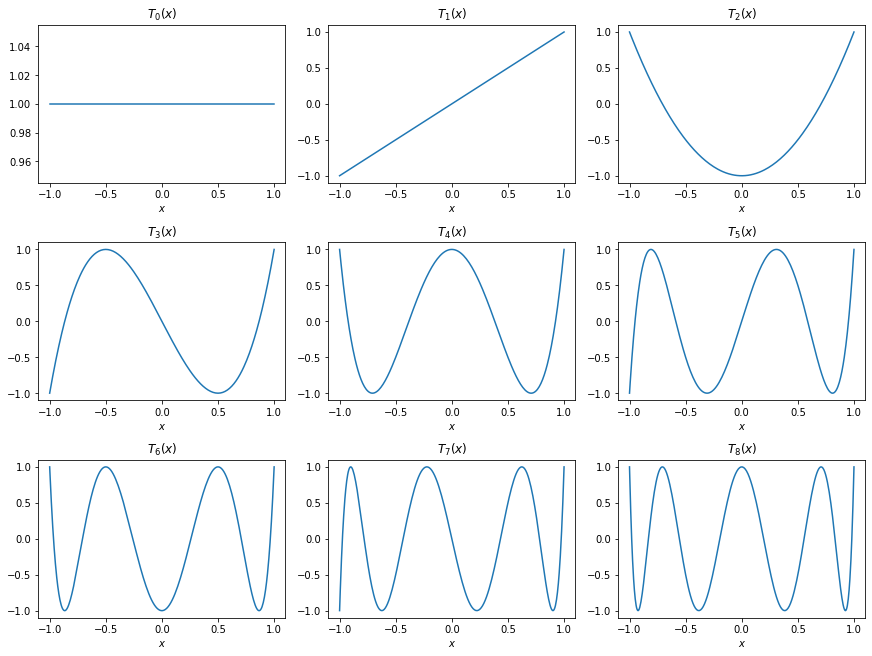

In [ ]:
# Gráfico de polinomios de Chebyshev
import numpy as np
import matplotlib.pyplot as plt

def polinomio_chebyshev(n):
    """Devuelve una función que computa el polinimio de Chebyshev de grado N."""
    if n == 0:
        return lambda x: np.ones_like(x)
    if n == 1:
        return lambda x: x
    else:
        return lambda x: 2*x*polinomio_chebyshev(n-1)(x) \
                           - polinomio_chebyshev(n-2)(x)

N = 256
theta = np.linspace(0, np.pi, N)
x     = np.cos(theta)

fig, axs = plt.subplots(3, 3, figsize=(12,9), constrained_layout=True)
axs      = axs.flatten()
for i, ax in enumerate(axs):
    ax.set_title(f"$T_{i}(x)$")
    ax.plot(x, polinomio_chebyshev(i)(x))
    ax.set_xlabel("$x$")



### **Cálculo de derivadas a partir de una serie de Chebyshev**

Usando las propiedades introducidas, podemos obtener $f'(x)$ a partir de $\hat f_m$. Para ello, consideremos
\begin{equation*}
    f'(x) \approx \sum_{m=1}^M \hat f_m T_m'(x) = \sum_{m=0}^M \hat f_m^{(1)} T_m(x), \qquad \qquad \hat f^{(1)}_M = 0.
\end{equation*}
El segundo miembro surge de derivar término a término la serie de Chebyshev para $f$. Notar que como $T_m(x)$ es un polinomio de grado $m$, desaparece el término asociado a $m=0$. Por otro lado, el tercer miembro surge de considerar que $f'$ tendrá su propia representación en términos de $T_m(x)$. Sin embargo, es necesario anular $\hat f^{(1)}_M$, para que los grados a ambos lados de la igualdad coincidan. Utilizando las propiedades mencionadas anteriormente, tenemos entonces
\begin{align*}
    \sum_{m=1}^M \hat f_m T_m'(x) &= \hat f_0^{(1)} + \hat f_1^{(1)} T_1(x) + \sum_{m=2}^{M-1} \frac{\hat f_m^{(1)}}{2}\left[ \frac{T'_{m+1}}{m+1}  - \frac{T'_{m-1}}{m-1}\right]\\
    &= \frac{\hat f_{M-1}^{(1)}}{2M} + \sum_{m=1}^{M-2} \frac{1}{2m} \left(c_{m-1} \hat f_{m-1}^{(1)} - \hat f_{m+1}^{(1)} \right) T'_m,
\end{align*}
donde en la última expresión procedimos a ordenar la suma de acuerdo al grado de $T'_m(x)$, utilizando $T'_1(x) = 1$ y $T'_2(x) = 4 T_1(x)$. Comparando los términos izquierdo y derecho de esta expresión, y utilizando que los $T'_m$ son ortogonales$^\dagger$, obtenemos la relación de recurrencia
\begin{equation*}
\hat f_M^{(1)} = 0, \qquad \hat f_{M-1}^{(1)} = 2M \hat f_M, \qquad \qquad    \hat f_{m-1}^{(1)} = \frac{2m \hat f_m + \hat f_m^{(1)}}{c_{m-1}}, \tag{7}
\end{equation*}
que permite obtener los coeficientes de la serie de Chebyshev de $f'$ a partir de los de $f$. Notar que se obtienen primero los coeficientes asociados a los polinomios de mayor grado. Adicionalmente, recuerden que $c_m = 1$ excepto por $c_0 = c_M = 2$.

$^\dagger$: Es fácil probarlo a partir de las relaciones de la sección previa.

### **Transformada discreta de Chebyshev**

Resolver un cierto problema diferencial de manera numérica va a implicar conocer $f$ sobre una cantidad discreta de puntos $f(x_n) = f_n$. Sin embargo, dado que queremos representar $f(\cos \theta)$ mediante el par de transformadas $(5)$ y $(6)$, vamos a precisar que $\theta$ se distribuya de manera equiespaciada. De esta manera, los coeficientes $\hat f_m$ pueden aproximarse mediante una regla trapezoidal de manera precisa.

Si contamos con $N+1$ puntos en el espacio físico, entonces $\theta_n = n \pi /N$ y el siguiente esquema discreto
\begin{align*}
    \hat f_m &= \frac{2}{c_m} \sum_{n=0}^N \frac{1}{c_n} f_n \cos\left(\frac{\pi m n}{N} \right), \tag{TDC}\\
    f_n &= \sum_{m=0}^N \hat f_m \cos\left(\frac{\pi m n}{N} \right), \tag{ITDC}
\end{align*}
será una buena aproximación al problema continuo presentado en la sección previa. Por analogía con la transformada de Fourier, vamos a llamar a estas expresiones la transformada discreta de Chebyshev (TDC) y transformada discreta inversa de Chebyshev (ITDC)

Obtuvimos una representación en serie que converge rápido, puede computarse en poca cantidad de operaciones y que, como veremos, es fácil de derivar. Vale mencionar, no obstante, que el costo que pagamos por ello es que ahora $f_n = f(x_n) = f(\cos(\theta_n))$ ya no queda determinado sobre una grilla equiespaciada. Más aún, podemos estimar fácilmente que si $\Delta_0 x$ es el espaciamiento típico cerca del origen, en los bordes tendremos un espaciamiento de orden $(\Delta_0 x)^2$. Veamos como quedan distribuidos estos puntos, llamados de Gauss-Lobatto (o a veces de Chebyshev-Gauss-Lobatto).


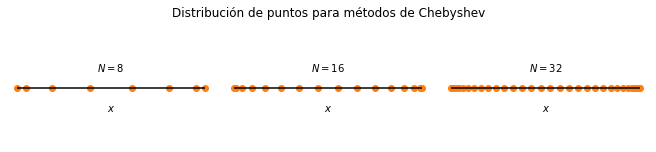

In [ ]:
# Distribución de puntos de Gauss-Lobato
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(9,2), constrained_layout=True)
fig.suptitle("Distribución de puntos para métodos de Chebyshev")
for i, N in enumerate([8, 16, 32]):
    theta = np.linspace(0, np.pi, N)
    x     = np.cos(theta)

    axs[i].plot(x, np.ones_like(x), 'o', color="C1", zorder=-i)
    axs[i].axis("off")
    axs[i].hlines(1, x[0], x[-1])
    axs[i].text(0, 1.02, f"$N={N}$", va="center", ha="center")    
    axs[i].text(0, 0.98,      "$x$", va="center", ha="center")

Esta distribución de puntos puede ser deseable en algunos problemas que desarrollan dinámicas en escalas particularmente pequeñas cerca de los bordes. El estudio de efectos peliculares en electromagnetismo, es un ejemplo con estas características. Sin embargo, para problemas de tipo parabólico, esto quiere decir que la condición de CFL se volverá particularmente restrictiva. Por ejemplo, para una ecuación de difusión, la condición de CFL establece que $\Delta t \propto (\Delta _0 x)^4$. Es usual que métodos basados en representaciones de Chebyshev integren los términos parabólicos de una EDP mediante esquemas implícitos para sortear este inconveniente.

### **Matriz de diferenciación de Chebyshev**

Una forma de utilizar el método de Chebyshev para calcular derivadas dado $f_j$ (con $x_j$ siguiendo una distribución de Gauss-Lobatto) es haciendo algo similar a lo que hacíamos mediante el método de Fourier. Comenzaremos por obtener los $\hat f_m$. Para ello se pueden utilizar transformadas rápidas, pero por motivos pedagógicos consideremoslo primero mediante una cierta matriz de proyección al dominio espectral $\mathbb P^e$. Notar que basta definir
\begin{equation*}
    \mathbb P^e = \frac{2}{N} \begin{pmatrix}
    1/4 & 1/2 & 1/2 & \dots & 1/2 & 1/4 \\
    1/2 &\cos(\pi/N) & \cos(2\pi/N) & \dots & \cos((N-1)\pi/N) & -1/2\\
    1/2 &\cos(2\pi/N) & \cos(4\pi/N) & \dots & \cos(2(N-1)\pi/N) & 1/2\\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
    1/2 & \cos((N-1)\pi/N) & \cos((N-1)2\pi/N) & \dots & \cos((N-1)^2 \pi/N) & (-1/2)^{N-1}\\
    1/4 & -1/2 & 1/2 & \dots & (-1/2)^{N-1} & (-1/4)^{N}
    \end{pmatrix}
\end{equation*},
para obtener $\hat{\mathbf f} = (\hat f_0, \hat f_1,\  \dots \ , \hat f_N)$ como
\begin{equation*}
    \hat{\mathbf f} = \mathbb P^e \hat{\mathbf f}.
\end{equation*}

Por otro lado, la relación de recurrencia hallada en la sección previa, también puede representarse matricialmente, de forma que
\begin{equation*}
    \hat{\mathbf f}^{(1)} = \mathbb D^e \hat{\mathbf f}, \qquad \qquad 
    \mathbb D^e= \begin{pmatrix}
    0 & 1 & 0 & 3 & 0 & 5 & \dots & N-1 & 0 & N \\
    0 & 0 & 4 & 0 & 8 & 0 & \dots & 0 & 2(N-1) & 0 \\
    0 & 0 & 0 & 6 & 0 & 10& \dots & 4(N-1) & 0 & 2N \\
    0 & 0 & 0 & 0 & 8 & 0 & \dots & 0 & 2(N-1) & 0\\    
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
    0 & 0 & 0 & 0  & 0 & 0 & \dots & 4(N-1) & 0 & 2N \\
    0 & 0 & 0 & 0  & 0 & 0 & \dots & 0 & 2(N-1) & 0 \\
    0 & 0 & 0 & 0  & 0 & 0 & \dots & 0 & 0 & 2N \\
    0 & 0 & 0 & 0  & 0 & 0 & \dots & 0 & 0 & 0 \\            
    \end{pmatrix},
\end{equation*}
con $\mathbb D^e$ la matriz de diferenciación en el dominio espectral (de Chebyshev). Notar que asumimos $N$ par (caso contrario la primer fila termina con un $0$).

Finalmente para obtener la derivada buscada $\mathbf f'$ podemos realizar proyectar los $\hat{\mathbf f}^{(1)}$ al espacio físico como
\begin{equation*}
    \mathbb f' = \mathbb P^f \hat{\mathbf f}^{(1)},
\end{equation*}
con 
\begin{equation*}
    \mathbb P^f = \begin{pmatrix}
    1 & 1 & 1 & \dots & 1 & 1 \\
    1 &\cos(\pi/N) & \cos(2\pi/N) & \dots & \cos((N-1)\pi/N) & -1\\
    1 &\cos(2\pi/N) & \cos(4\pi/N) & \dots & \cos(2(N-1)\pi/N) & 1\\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
    1 & \cos((N-1)\pi/N) & \cos((N-1)2\pi/N) & \dots & \cos((N-1)^2 \pi/N) & (-1)^{N-1}\\
    1 & -1 & 1 & \dots & (-1)^{N-1} & (-1)^{N}
    \end{pmatrix}.
\end{equation*}

Todas estas operaciones podemos sintetizarlas en una única matriz de diferenciación de Chebysheb en el espacio físico $\mathbb D^f = \mathbb P^f \mathbb D^e \mathbb P^e$ que verifica
\begin{equation*}
    \mathbf f' = \mathbb D^f \mathbf f.
\end{equation*}

Puede obtenerse una forma cerrada para $D_s$, que queda definida como
\begin{equation*}
    [\mathbb D^f]_{ij} = \begin{cases}
    \dfrac{2N^2+1}{6} \qquad \quad & \text{para } \quad i=j=0,\\
    \dfrac{-x_j}{2(1-x_j^2)} \qquad \quad & \text{para } \quad i=j=1,\dots,N-1,\\
    -\dfrac{2N^2+1}{6} \qquad \quad & \text{para } \quad i=j=N,\\
    \dfrac{c_i}{c_j}\dfrac{(-1)^{i+j}}{x_i - x_j} \qquad \quad & \text{para } \quad i \ne j .
    \end{cases}
\end{equation*}

Noten que esta matriz fue construida para $x_n = \cos(\theta_n)$ y por tanto opera sobre el vector $\mathbf x = (1, \dots, -1)$. Si queremos una matriz que opera con $\mathbf x$ y $\mathbf f$ ordenados en sentido creciente, basta con utilizar la regla de la cadena, lo que implica que debemos multiplicar esta matriz por $-1$.

Adjuntamos en el apunte una función [`matriz_diferenciacion_chebyshev`](#cheb_matrix) que calcula una matriz de diferenciación de este tipo dada la cantidad de puntos de grilla $N+1$ y que pueden usar en los ejercicios.

#### **Matrices para derivadas de órdenes superiores**

Es inmediato mostrar que para obtener matrices que estimen derivadas de órdenes superiores basta con elevar $\mathbb D^f$ a una potencia igual al orden de la derivada que se desea estimar. Por ejemplo, la matriz que permite obtener la derivada segunda $\mathbb D^{(2)f}$ puede obtenerse como
\begin{equation*}
    \mathbf f'' \approx \mathbb D^{(2)f} \mathbf f = (\mathbb D^f)^2 \mathbf f.
\end{equation*}

### **Condiciones de Dirichlet en la matriz de diferenciación de Chebyshev**

Una ventaja de la formulación matricial es que para incorporar condiciones de contorno en nuestro problema, podemos proceder de manera completamente análoga a lo realizado en la práctica 5. La idea es que $\mathbb D^f$ calcula la derivada en todos los puntos del dominio, incluido los bordes. 

Por ejemplo, dado un problema de Poisson en el que conocemos $f_0$ y $f_N$, podemos escribir el siguiente sistema de ecuaciones
\begin{equation*}
    \tilde{\mathbb D}^{(2)f} \mathbf f = \tilde {\mathbf q },
\end{equation*}
con
\begin{equation*}
    \tilde{\mathbb D}^{(2)f} =
    \left( \begin{array}{c}
    1 & 0 & 0 &  \dots & 0 & 0 & 0 \\
    \hline\\[-1em]
    &&&[\mathbb D^{(2)f}]_{1:N-1}\\[2em]
    \hline
    0 & 0 & 0 &  \dots & 0 & 0 & 1 \\    
    \end{array}\right),
\qquad \qquad 
\tilde{\mathbf q} = \begin{pmatrix}
    f_0 \\
    q_1 \\
    q_2 \\
    \vdots \\
    q_{N-1} \\
    f_N
\end{pmatrix},
\end{equation*}
donde $[\mathbb D^{(2)f}]_{1:N-1}$ representa las filas $1$ a $N-1$ de $\mathbb D^{(2)f}$ y $q_n$ es el forzante de la ecuación sobre el punto $x_n$.

De manera análoga podríamos tratar contornos de tipo Neumann, utilizando la primer y última fila de $\mathbb D^f$ en lugar de $(1\ 0\ \dots\ 0)$ y $(0\ 0\ \dots\ 1)$ respectivamente, con el correspondiente cambio en el primer y último elemento de $\tilde{\mathbf q}$.

### **Transformada rápida de Chebyshev**

Si bien en esta práctica vamos a usar matrices de diferenciación para tratar problemas con el método de Chebyshev, esto es poco usual, ya que requiere $\mathcal O(N^2)$ operaciones para un problema 1D.

Existe otra opción que es proceder de manera completamente análoga al caso de Fourier, puesto que la TDC y la ITDC pueden computarse con esquemas rápidos en $\mathcal{O}(N \log(N))$. Para ello podemos valernos de algoritmos de Transformada Coseno Rápida (FCT) que una gran cantidad de bibliotecas numéricas implementan, entre otras Scipy.

Luego, si contamos con una forma rápida de obtener los coeficientes $\hat f_m$, podemos usar la relación de recurrencia $(7)$ para obtener los coeficientes de la derivada en $\mathcal{O}(N)$ operaciones. En caso que deseemos obtener derivadas de orden superior, podemos aplicar sucesivamente la misma regla de recurrencia, o derivar una para el orden de derivación buscado.

Veamos un código que realiza esta tarea:

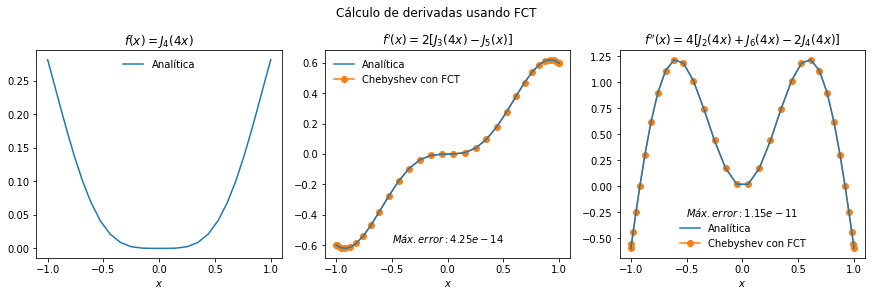

In [ ]:
!pip install --upgrade scipy>=1.7
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

def derivada_chebyshev_fct(f, o=1):
    import scipy.fft as spfft
    """
        Computa la derivada de orden arbitrario de f usando un método rápido
    de Chebyshev. f debe estar definida sobre puntos x_i = cos[(N-i-1)π/(N-1)],
    es decir sobre una grilla de Gauss-Lobatto ordenada de manera creciente.

    Entrada:
        -`f`:  Vector (N) con los valores de una cierta función sobre los
            puntos de Gauss-Lobatto.
        -`o`:  Orden de la derivada buscada.
    
    Salida:
        -`fp`: Vector (N) con los valores de la o-ésima derivada sobre la grilla
            de Gauss-Lobatto.
    """
    N  = f.size
    F  = spfft.dct(f, type=1, norm="forward")
    Fp = np.zeros_like(F)
    # Hago la recurrencia o veces
    for i in range(1, o+1):
        # Trato los términos iniciales
        Fp[-i-1] = 2*(N-i)*F[-i]
        Fp[-i]   = 0
        # Aplico la recurrencia
        for j in range(N-i-2, -1, -1):
            Fp[j] = 2*(j+1)*F[j+1] + Fp[j+2]
        
        # Guardo los coeficientes para la derivada en F. Y vuelvo a iterar si
        # preciso una derivada de orden superior.
        F = Fp.copy()

    fp = spfft.idct(F, type=1, norm="forward")
    return (-1)**o * fp

N  = 32                                        # Cantidad de puntos
th = np.linspace(0, np.pi, N)                  # Grilla equiespaciada
x  = - np.cos(th)                              # Grilla de Gauss-Lobatto

f   = jv(4, 4*x)                               # Función a derivar
fp  = 2*(jv(3,4*x) - jv(5,4*x))                # Derivada analítica
fpp = 4*(jv(2,4*x) + jv(6,4*x) - 2*jv(4,4*x))  # Derivada segunda analítica

fc  = derivada_chebyshev_fct(f)                # Derivada con Chebyshev
fcc = derivada_chebyshev_fct(f, o=2)           # Derivada segunda con Chebyshev

err_p  = np.max(np.abs(fp  - fc ))             # Error en la primer derivada
err_pp = np.max(np.abs(fpp - fcc))             # Error en la segunda derivada

# Gráficos
fig, axs = plt.subplots(1, 3, figsize=(12,4), constrained_layout=True)
fig.suptitle("Cálculo de derivadas usando FCT")

axs[0].plot(x, f, label="Analítica")
axs[0].set_title("$f(x) = J_4(4x)$")

axs[1].plot(x, fp, label="Analítica")
axs[1].plot(x, fc,  "-o", zorder=-1, label="Chebyshev con FCT")
axs[1].set_title("$f'(x) = 2[J_3(4x) - J_5(x)]$")
axs[1].text(0, -0.55, f"$Máx. error:{err_p:.2e}$", va="center", ha="center")

axs[2].plot(x, fpp, label="Analítica")
axs[2].plot(x, fcc, "-o", zorder=-1, label="Chebyshev con FCT")
axs[2].set_title("$f''(x) = 4[J_2(4x) + J_6(4x) - 2J_4(4x)]$")
axs[2].text(0, -0.25, f"$Máx. error:{err_pp:.2e}$", va="center", ha="center")

[ax.legend(frameon=False) for ax in axs]
[ax.set_xlabel("$x$") for ax in axs];

Noten que para poder utilizar una normalización similar a la que venimos usando hasta ahora (y que es usual en la bibliografía), debemos usar <tt>norm="forward"`</tt>. Esta normalización solo la incorporan versiones de Scipy mayores o iguales a 1.6 que Google Colab no incorpora por defecto$^\dagger$. Adicionalmente, la transformada realizada por Scipy considera $c_m = 1 \ \forall m$, por lo que no es necesario tratar de forma separada los modos $0$ y $N$ en la relación de recurrencia.

<font size="small">
$^\dagger$: Usamos 1.7 para evitar conflictos entre paquetes de Google Colab.

## **Comentarios finales sobre métodos espectrales**

Vale resaltar que en el caso de Fourier también puede realizarse la diferenciación numérica mediante una cierta matriz de diferenciación. Adicionalmente, tanto en el caso de Chebyshev como en el de Fourier las matrices de diferenciación pueden obtenerse como un aproximante de diferencias finitas de orden máximo para el caso equiespaciado periódico (Fourier) o una grilla de Gauss-Lobatto (Chebyshev).

Sin embargo, quedarse únicamente con esa manera de ver a los métodos espectrales resultaría bastante límitada. Por un lado, como vimos anteriormente, el uso de matrices de diferenciación requiere $\mathcal O (N^2)$ operaciones, mientras que los métodos que diferencian en el dominio espectral y emplean transformadas rápidas, requieren $\mathcal O(N\log N)$ operaciones. Además del cósto asintótico de cada método (que es una característica muy relevante), en problemas no lineales, vimos el problema del _aliasing no-lineal_, cuyo origen y solución resulta considerablemente más natural en el enfoque espectral. Adicionalmente, las propiedades de convergencia de estos métodos son sencillas de estudiar a partir de conocimientos sobre representaciones en series de funciones y en particular de series de Fourier.

Más aún, y como vieron en teóricas, los métodos espectrales permiten evolucionar directamente los coeficientes de una cierta representación para nuestra función de interés (método de Galerkin). Bajo este método, pueden evolucionarse de manera natural funciones que pertenezcan a un cierto subespacio, como por ejemplo, aquellas que posean una cierta condición de contorno, o algún otro tipo de condición.

**Es importante remarcar que el enfoque presentado en esta práctica sobre métodos espectrales, i.e. un método rápido y preciso para calcular derivadas, apenas tiene un objetivo introductorio y pedagógico**. Las técnicas espectrales suelen ser muy apropiadas en el estudio de numérico de sistemas físicos, y esperamos que estos ejercicios les ayuden a resolver problemas de su interés.

## **Findiff en grillas no equiespaciadas**

También necesitarán en para un ejercicio de esta práctica, calcular derivadas mediante esquemas de diferencias finitas para grillas no uniformes. Esto pueden hacerlo mediante Findiff, y de manera muy similar a como vienen utilizando esta biblioteca.

Hasta el momento, la generación de matrices de diferenciación la realizaban mediante `FinDiff(0, dx, ord, acc=prec).matrix((Nx,1))`, donde `0` denota el eje en el arreglo de destino sobre el que debe operar la matriz, `dx` el espaciamiento entre puntos, `ord` el orden de la derivada buscada y `pres` el orden de precisión deseado. En caso que la grilla sea no uniforme, basta con reemplazar el escalar `dx` por un arreglo de puntos `x` con las coordenadas de cada punto de grilla. Veamos un ejemplo tomado de la [documentación de Findiff](https://findiff.readthedocs.io/en/latest/source/examples-non-uniform-grids.html):

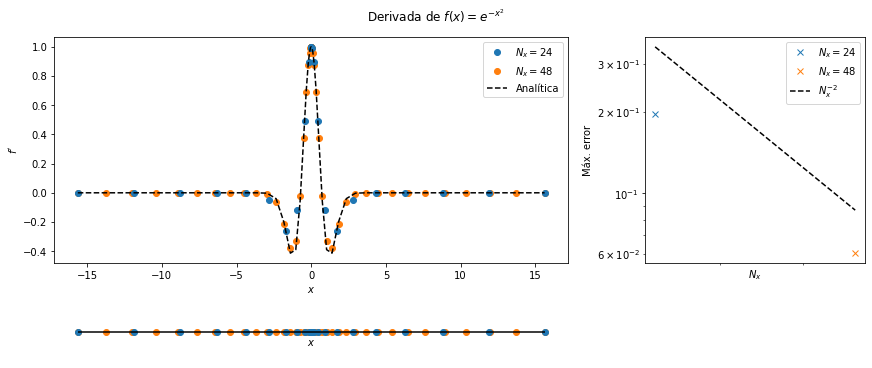

In [ ]:
# Instalar findiff si no está instalado
!if ! pip list | grep findiff >> /dev/null; then pip install findiff; fi
from findiff import FinDiff
import numpy as np
import matplotlib.pyplot as plt

NXS = np.array([24, 48])

fig, axs = plt.subplots(2, 2, figsize=(12,5), constrained_layout=True,
                        sharex="col", gridspec_kw={"width_ratios" : [.7,.3],
                                                   "height_ratios": [.8,.2]})

axs[1,1].remove()
for i, NX in enumerate(NXS):
    t = np.linspace(-2.5, 2.5, NX)
    x = t**3
    axs[1,0].plot(x, np.ones_like(x), 'o', zorder=-i)

    f   =  np.exp(-x**2) * x
    fp =  np.exp(-x**2) * (1 - 2*x**2)

    D   = FinDiff(0, x, 1, acc=2).matrix((NX,1))
    num = D @ f

    err = np.max(np.abs(fp - num))
    axs[0,0].plot  (x , num, 'o', label=f"$N_x={NX}$", zorder=-i)
    axs[0,1].loglog(NX, err, 'x', label=f"$N_x={NX}$")

axs[0,0].plot(x, fp, '--k', label="Analítica")
axs[0,0].set_xlabel("$x$")
axs[0,0].set_ylabel("$f'$")

axs[0,1].loglog(NXS, 2e2*NXS**-2.0, '--k', label="$N_x^{-2}$")
axs[0,1].set_xlabel("$N_x$")
axs[0,1].set_ylabel("Máx. error")

axs[1,0].axis("off")
axs[1,0].hlines(1, x[0], x[-1])
axs[1,0].text(0, 0.98, "$x$", va="center", ha="center")

[ax.legend()                                for ax in axs[0].flatten()]
[ax.xaxis.set_tick_params(labelbottom=True) for ax in axs[0].flatten()]
fig.suptitle("Derivada de $f(x) = e^{-x^2}$");

Como muestra el panel de la derecha, tenemos el orden de convergencia requerido, aún cuando la grilla es no uniforme. Para ayudar a visualizar el espaciamiento entre puntos, colocamos abajo un eje con los puntos de cada grilla. Vemos que claramente es no uniforme, con más puntos cerca del centro (donde el gradiente es mayor) y menos hacia los extremos.

Solo una nota de cautela: en lo que he podido notar Findiff no permite obtener el orden de precisión requerido en caso para derivadas pares en caso que las grillas no varíen suavemente. En este caso por ejemplo, donde $x = t^3 = \xi(t)$ con $t$ equiespaciada y $\xi$ una función suave, esto no es problema. Pero si nuestra grilla fuera aleatoria y quisieramos obtener la $p$-ésima derivada, donde $p$ es par, con orden de precisión $o$, el esquema generado por FinDiff resultaría en una estimación con orden de precisión $o-1$. Los motivos por los que esto sucede los vieron en la práctica sobre el Método de Volumenes Finitos (MVF), en un contexto ligeramente distinto.

## **Referencias**



- L. N. Trefethen. 2000. _Spectral methods in MATLAB_. Society for Industrial and Applied Mathematics, USA.
- C. Canuto, M. Y. Hussaini, A. Quarteroni- T. A. Zang Jr. (1988). _Spectral Methods in Fluid Dynamics_. Part of  Springer Series in Computational Physics.  Springer.
- J. Shen, T. Tang, L. Wang. (2011). _Spectral methods_. Part of Springer Series in Computational Mathematics. Springer.
- Orszag, S. A. (1971). _On the Elimination of Aliasing in Finite-Difference Schemes by Filtering High-Wavenumber Components_, Journal of Atmospheric Sciences, 28(6), 1074-1074.

---
---

<a name="funciones"></a>

# **Funciones útiles**

Adjuntamos a continuación algunas funciones que pueden resultarles de utilidad para la realización de esta Práctica o el análisis de los resultados obtenidos.

### **Matrices de diferenciación para condiciones de contorno periódicas (diferencias finitas)**

In [ ]:
#@title
def diferenciacion_centrada_periodica(N, d, orden=1, precision=2):
    """ 
    Devuelve una representación rala de la matriz de diferenciación que
    aproxima a la derivada de un cierto orden. Puede devolver esquemas con
    distintos órdenes de precisión.

    Entrada:
        - `N`:         Cantidad de puntos a diferenciar.
          (entero)
        - `d`:         Espaciamiento entre puntos.
          (flotante)
        - `orden`:     Orden de la derivada a aproximar.
          (entero)
        - `precision`: Orden de precisión del aproximante utilizado.
          (entero)
    
    Salida:
        - `D`: Representación rala de la matriz de diferenciación.
          (`scipy.sparse.dia.dia_matrix`)
    """
    from scipy.sparse import diags

    if precision > N-1:
        raise ValueError("Cantidad de puntos insuficiente para"
                         " la precisión requerida.")

    # Derivada primera    
    if orden == 1:
        if precision == 2:
            coefs = [ [-1], [0], [1] ]
            fact  = 1/2
        elif precision == 4:
            coefs = [ [1], [-8], [0], [8], [-1] ]
            fact  = 1/12
        elif precision == 6:
            coefs = [ [-1], [9], [-45], [0], [45], [-9], [1] ]
            fact  = 1/60
        elif precision == 8:
            coefs = [ [3], [-32], [168], [-672], [0], [672], [-168], [32], [-3] ]
            fact  = 1/840
        else:
            raise ValueError("Orden de precisión inexistente o"
                             " no implementado.")

        fact *= 1/d

    # Derivada segunda
    elif orden == 2:
        if precision == 2:
            coefs  = [ [1], [-2], [1] ]
            fact   = 1
        elif precision == 4:
            coefs  = [ [-1], [16], [-30], [16], [-1] ]
            fact   = 1/12
        elif precision == 6:
            coefs  = [ [2], [-27], [270], [-490], [270], [-27], [2] ]
            fact   = 1/180
        elif precision == 8:
            coefs  = [ [-9], [128], [-1008], [8064], [-14350] ]
            coefs += [ [8064], [-1008], [128], [-9] ]
            fact   = 1/5040
        else:
            raise ValueError("Orden de precisión inexistente o"
                             " no implementado.")
        
        fact *= 1/d**2
    else:
        raise ValueError("Orden de derivación inexistente o no implementado.")

    # Periodicidad
    l        = len(coefs)
    coefs   += coefs[:l//2] + coefs[l//2+1:]
    offsets  = list(range(-l//2+1, l//2+1))
    offsets += [  N + offsets[i] for i in range(0     , l//2) ]
    offsets += [ -N + offsets[i] for i in range(l//2+1,    l) ]

    return fact*diags(coefs, offsets=offsets, shape=(N,N))

---

### **Matriz de diferenciación de Chebyshev de primer orden**

In [ ]:
#@title
def diferenciacion_chebyshev(N):
    """
        Crea una matriz de diferenciación de Chebyshev para N puntos que se
    ubican sobre una grilla x_i = cos[(N-i-1)π/(N-1)] (Gauss-Lobato).

    Entrada:
        -`N`: Tamaño de la matriz de diferenciación.
    Salida:
        -`D`: Matriz (NxN) de diferenciación.
    """
    import numpy as np

    # Deshabilito los warnings de división por cero.
    with np.errstate(invalid="ignore", divide="ignore"):
        # Genero la grilla
        x = np.cos(np.linspace(0, np.pi, N))
        # Armo la matriz de signos
        D = (-1)**(np.arange(0, N)[:,None] + np.arange(0, N)[None,:])
        # Divido por las distancias entre puntos
        D = D/(x[:,None] - x[None,:])
        # Escaleo la primer y última fila (excepto las esquinas)
        D[[0,-1], 1:-1] = 2*D[[0,-1], 1:-1]
        # Escaleo la primer y última columna (excepto las esquinas)
        D[1:-1, [0,-1]] = .5*D[1:-1, [0,-1]]
        # Elimino NaN de la diagonal. Elijo cero como valor por el próximo paso.
        np.fill_diagonal(D, 0)
        # Cada fila debe sumar 0, con esto completo la diagonal.
        np.fill_diagonal(D, - np.sum(D, axis=1))
    
    # Devuelvo -D porque quiero usar una grilla con x creciente
    return -D


---

### **Gráfico 1D animado**

In [ ]:
#@title
def grafico1d_animado(abscisas, ordenadas, dt, leyendas=None, titulo="",
                      etiqueta_x="", etiqueta_y="", paso=1, rescalar=False,
                      figsize=None):
    """
    Genera un gráfico animado 1D.

    Entrada:
        - `abscisas`:   arreglo 1D o lista de arreglos 1D con las abscisas para
                            cada conjunto de datos.
        - `ordenadas`:  arreglo de dimensión 2 con el valor de las ordenadas
                            para cada tiempo. La cantidad de filas corresponde
                            a la cantidad de niveles temporales y debe ser igual
                            para cada conjunto de datos. La cantidad de columnas
                            debe coincidir con la cantidad de elementos en las
                            abscisas.
        - `dt`:         paso temporal entre muestras.
        - `leyendas`:   string o lista de strings con la etiqueta para cada set
                            de datos.
        - `titulo`:     string con el título del gráfico.
        - `etiqueta_x`: string con la etiqueta para el eje x [OPCIONAL].
        - `etiqueta_y`: string con la etiqueta para el eje y [OPCIONAL].
        - `paso`:       espaciamiento en los datos para cada fotograma.
        - `rescalar`:   True para recalcular los limites de la figura en cada
                            fotograma.
        - `figsize`:    tamaño de la figura.                    
    
    Salida:
        - `anim`:   referencia al objeto de animación creado.
    """

    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation

    #   Control de errores y flexibilidad para permitir uno o varios
    # sets de datos.
    if not isinstance(abscisas, list):
        if not isinstance(abscisas, np.ndarray):
            print("El primer argumento de `grafico1d_animado` debe ser un "
                  "arreglo con las abscisas o una lista de arreglos.")
            raise
        else:
            abscisas = [abscisas]

    if (not isinstance(ordenadas, list)):
        if (not isinstance(ordenadas, np.ndarray)):
            print("El segundo argumento de `grafico1d_animado` debe ser un "
                  "arreglo con los datos o una lista de arreglos.")
            raise
        else:
            ordenadas = [ordenadas]

    if len(abscisas) != len(ordenadas):
        print("La cantidad de arreglos de abscisas y de ordenadas debe "
              "ser la misma.")
        raise

    if leyendas is None:
        leyendas = [None]*len(ordenadas)
    elif leyendas and isinstance(leyendas, list):
        if len(ordenadas) != len(leyendas):
            print("Ordenadas y leyendas deben tener la misma cantidad de ", 
                  "elementos.")
            raise
    else:
        leyendas = [leyendas]

    # Guardo el estado de plt
    params_viejos = plt.rcParams
    plt.rc('animation', html='jshtml')

    num_foto = ordenadas[0].shape[0]

    fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=True)
    plt.close();  # Cerrar la figura, animation va a crear la suya propia

    # Inicializo las curvas
    plots = [ ax.plot([], [], label=leyendas[i])[0]
              for i in range(len(ordenadas)) ]
    ax.set_title(titulo + f" $t=0$")
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiqueta_y)

    def init():
        """ Inicializador de la figura y gráfico de condiciones iniciales."""
        for i, (x, f) in enumerate(zip(abscisas, ordenadas)):
            plots[i].set_xdata(x)
            plots[i].set_ydata(f[0])
        
        ax.relim()
        ax.autoscale_view()

        return plots

    def actualizar(t):
        """ Actualiza los datos al fotograma actual."""        
        print(f"\rCalculando fotograma {t//paso} de {(num_foto-1)//paso}",
              end="")
        for i, f in enumerate(ordenadas):
            plots[i].set_ydata(f[t])
        
        ax.set_title(titulo + f" $t={t*dt:.5f}$")
        
        if rescalar:
            ax.relim()
            ax.autoscale_view()

        return plots

    anim = animation.FuncAnimation(fig, actualizar, init_func=init,
                                   frames=range(0, num_foto, paso),
                                   blit=True, repeat=True)

    # Restauro el estado de plt
    plt.rc(params_viejos)

    return anim

---

### **Gráfico 2D animado**

In [ ]:
#@title
def grafico2d_animado(x, y, escalar, dt, titulo="", etiqueta_x="",
                      etiqueta_y="",etiqueta_escalar="", figsize=None,
                      paso=1):
    """
    Genera un gráfico animado 2D.

    Entrada:
        - `x`:       arreglo 1D (NX) con las abscisas de los datos datos.
        - `y`:       arreglo 1D (NY) con las ordenadas de los datos datos.        
        - `escalar`: arreglo 2D (NX,NY) con los valores del campo escalar sobre
                     la grilla cartesiana.
        - `dt`:      paso temporal entre muestras.

        - `titulo`:           string con el título del gráfico [OPCIONAL].
        - `etiqueta_x`:       string con la etiqueta para el eje x [OPCIONAL].
        - `etiqueta_y`:       string con la etiqueta para el eje y [OPCIONAL].
        - `etiqueta_escalar`: string con la etiqueta del campo escalar 
                              [OPCIONAL].
        - `figsize`:          2-upla con el tamaño de la figura.
        - `paso`:             espaciamiento en los datos para cada fotograma.
                              [OPCIONAL]
    
    Salida:
        - `anim`:   referencia al objeto de animación creado.
    """

    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation

    # Guardo el estado de plt
    params_viejos = plt.rcParams
    plt.rc('animation', html='jshtml')

    num_foto =escalar.shape[0]

    fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=True)
    plt.close();  # Cerrar la figura, animation va a crear la suya propia

    # Inicializo las curvas
    plot = ax.imshow( np.ones((x.size, y.size)), extent=(x[0],x[-1],y[0],y[-1]),
                      origin="lower", interpolation='gaussian',
                      vmin=escalar.min(), vmax=escalar.max())

    cbar = fig.colorbar(plot, ax=ax, orientation="horizontal")
    cbar.set_label(etiqueta_escalar)

    ax.set_title(titulo + f" $t=0$")
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiqueta_y)

    def init():
        """ Inicializador de la figura y gráfico de condiciones iniciales."""
        plot.set_data(escalar[0].T)
        return plot,

    def actualizar(t):
        """ Actualiza los datos al fotograma actual."""        
        print(f"\rCalculando fotograma {t//paso} de {(num_foto-1)//paso}",
              end="")
        plot.set_data(escalar[t].T)
        
        ax.set_title(titulo + f" $t={t*dt:.5f}$")
        return plot,

    anim = animation.FuncAnimation(fig, actualizar, init_func=init,
                                   frames=range(0, num_foto, paso),
                                   blit=True, repeat=True)

    # Restauro el estado de plt
    plt.rc(params_viejos)

    return anim

---
---
---